In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
from os import walk

all_file = []
mypath="./youtube-new"
for (dirpath, dirnames, filenames) in walk(mypath):
    all_file.extend(filenames)
    break

In [3]:
all_file

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [4]:
all_country_category = {}
for file_name in all_file:
    if "category_id" in file_name:
        data = None
        with open(mypath+"/"+file_name) as f:
            data = json.load(f)
        all_country_category[file_name[0:2]+"_category"] = data

In [5]:
CAvideos = pd.read_csv(mypath+"/CAvideos.csv", error_bad_lines=False, encoding="utf-8").dropna()
CAvideos.name = "CAvideos"

DEvideos = pd.read_csv(mypath+"/DEvideos.csv", error_bad_lines=False, encoding="utf-8").dropna()
DEvideos.name = "DEvideos"

FRvideos = pd.read_csv(mypath+"/FRvideos.csv", error_bad_lines=False, encoding="utf-8").dropna()
FRvideos.name = "FRvideos"

GBvideos = pd.read_csv(mypath+"/GBvideos.csv", error_bad_lines=False, encoding="utf-8").dropna()
GBvideos.name = "GBvideos"

INvideos = pd.read_csv(mypath+"/INvideos.csv", error_bad_lines=False, encoding="utf-8").dropna()
INvideos.name = "INvideos"

JPvideos = pd.read_csv(mypath+"/JPvideos.csv", error_bad_lines=False, engine='python').dropna()
JPvideos.name = "JPvideos"

KRvideos = pd.read_csv(mypath+"/KRvideos.csv", error_bad_lines=False, engine='python').dropna()
KRvideos.name = "KRvideos"

MXvideos = pd.read_csv(mypath+"/MXvideos.csv", error_bad_lines=False, engine='python').dropna()
MXvideos.name = "MXvideos"

RUvideos = pd.read_csv(mypath+"/RUvideos.csv", error_bad_lines=False, engine='python').dropna()
RUvideos.name = "RUvideos"

USvideos = pd.read_csv(mypath+"/USvideos.csv", encoding="utf-8").dropna()
USvideos.name = "USvideos"



In [6]:
all_videos_list = [CAvideos, DEvideos, FRvideos, GBvideos, INvideos, JPvideos, KRvideos, MXvideos, RUvideos, USvideos]

In [7]:
# CA, DE, FR, GB, IN, JP, KR, MX, RU, US

In [8]:
def map_item(item, id_dict):
    id_dict[int(item["id"])] = item["snippet"]["title"]
    pass

def find_id_name(id_dict, id_value):
    if id_value == 29:
        return "Nonprofits & Activism"
    return id_dict[id_value]


for country_df in all_videos_list:
    name = country_df.name[:2]
    country_df["country"] = name
    print(name)
    country_category = all_country_category[name+"_category"]
    id_to_name = {}
    kinds = []
    for item in country_category["items"]:
        kinds.append(item["kind"])
        map_item(item, id_to_name)
    print(np.unique(np.array(kinds)))
    country_df['category'] = country_df.apply(lambda row: find_id_name(id_to_name, row.category_id), axis=1)
    

CA
['youtube#videoCategory']
DE
['youtube#videoCategory']
FR
['youtube#videoCategory']
GB
['youtube#videoCategory']
IN
['youtube#videoCategory']
JP
['youtube#videoCategory']
KR
['youtube#videoCategory']
MX
['youtube#videoCategory']
RU
['youtube#videoCategory']
US
['youtube#videoCategory']


In [9]:
all_videos = pd.DataFrame()
for i in all_videos_list:
    all_videos = all_videos.append(i, ignore_index=True)

In [10]:
all_videos.isnull().values.any()

False

In [11]:
all_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356464 entries, 0 to 356463
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                356464 non-null  object
 1   trending_date           356464 non-null  object
 2   title                   356464 non-null  object
 3   channel_title           356464 non-null  object
 4   category_id             356464 non-null  int64 
 5   publish_time            356464 non-null  object
 6   tags                    356464 non-null  object
 7   views                   356464 non-null  int64 
 8   likes                   356464 non-null  int64 
 9   dislikes                356464 non-null  int64 
 10  comment_count           356464 non-null  int64 
 11  thumbnail_link          356464 non-null  object
 12  comments_disabled       356464 non-null  bool  
 13  ratings_disabled        356464 non-null  bool  
 14  video_error_or_removed  356464 non-n

In [12]:
all_videos.to_json("all_videos.json")

# Basic Information

In [14]:
all_videos.describe()

category_id         views         likes      dislikes  comment_count
count  356464.000000  3.564640e+05  3.564640e+05  3.564640e+05   3.564640e+05
mean       20.200685  1.383166e+06  3.963098e+04  2.129943e+03   4.365354e+03
std         7.176479  7.277786e+06  1.692794e+05  1.977112e+04   2.407631e+04
min         1.000000  1.170000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%        17.000000  5.074525e+04  7.690000e+02  4.500000e+01   1.230000e+02
50%        23.000000  1.906165e+05  3.874000e+03  1.940000e+02   5.550000e+02
75%        24.000000  6.872010e+05  1.892750e+04  7.970000e+02   2.147000e+03
max        44.000000  4.245389e+08  5.613827e+06  1.753274e+06   1.228655e+06

In [15]:
numerics = ["views","likes","dislikes","comment_count"]

In [183]:
all_videos[["views","likes","comment_count","dislikes"]].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [23]:
import matplotlib.pyplot as plt

In [19]:
aggregation = all_videos[["views","likes","dislikes","comment_count", "trending_date"]].groupby(all_videos.trending_date.str[6:8]).sum()

<Figure size 720x360 with 0 Axes>

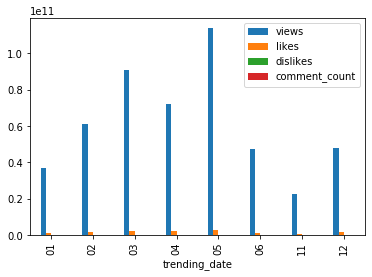

In [29]:
plt.figure(figsize=(10,5))
aggregation[["views","likes","dislikes","comment_count"]].plot.bar()

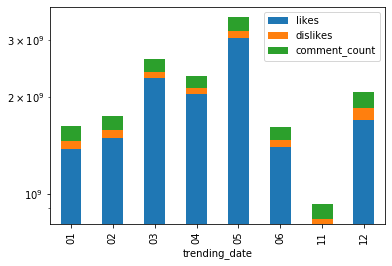

In [34]:
aggregation[["likes","dislikes","comment_count"]].plot.bar(stacked=True, logy=True)

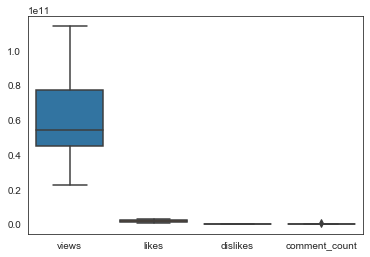

In [57]:
import seaborn as sns
sns.set_style("white")
# sns.boxplot(data = aggregation).set(yscale="log")
sns.boxplot(data = aggregation)

[None]

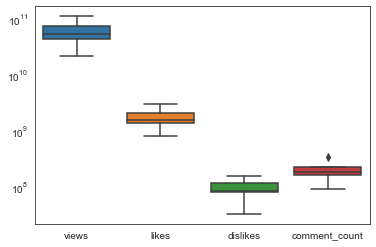

In [63]:
sns.boxplot(data = aggregation).set(yscale="log")

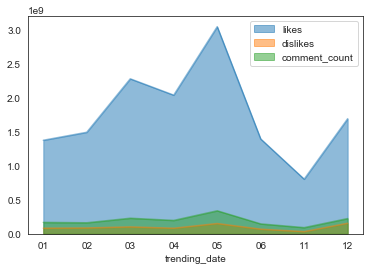

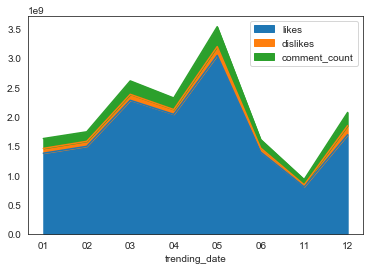

In [67]:
aggregation[["likes","dislikes","comment_count"]].plot.area(stacked=False)
aggregation[["likes","dislikes","comment_count"]].plot.area(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a54376d68>],
      dtype=object)

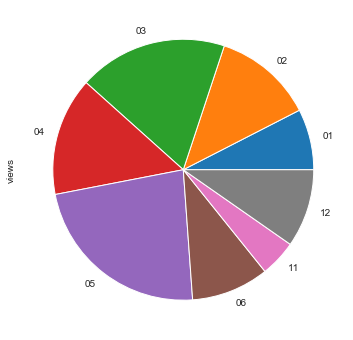

In [73]:
aggregation["views"].plot.pie(figsize=(6, 6), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a5444f550>],
      dtype=object)

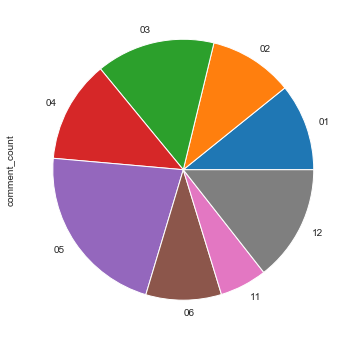

In [75]:
aggregation["comment_count"].plot.pie(figsize=(6, 6), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a5452de10>],
      dtype=object)

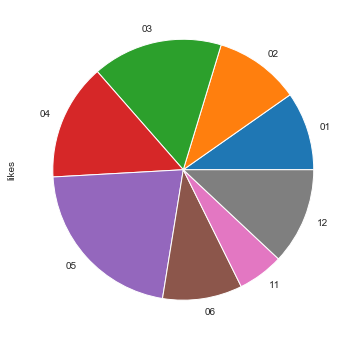

In [76]:
aggregation["likes"].plot.pie(figsize=(6, 6), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a54601160>],
      dtype=object)

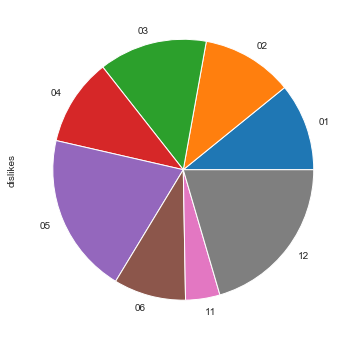

In [77]:
aggregation["dislikes"].plot.pie(figsize=(6, 6), subplots=True)

In [78]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131d32b00>,
      dtype=object)

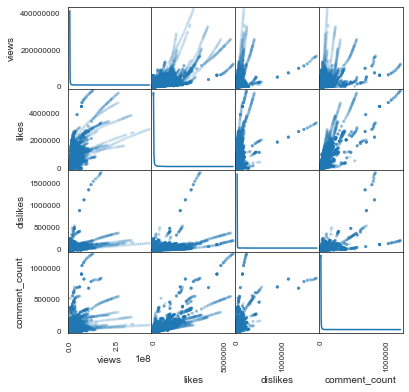

In [114]:
scatter_matrix( all_videos[numerics], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [109]:
aggregation2 = all_videos[["views","likes","dislikes","comment_count", "trending_date"]].groupby([all_videos.trending_date.str[6:8]]).sum()

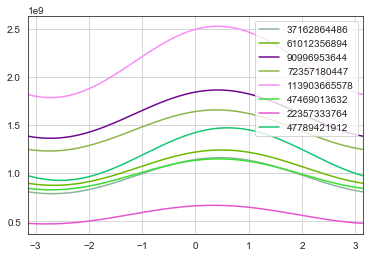

In [112]:
from pandas.plotting import andrews_curves
andrews_curves(aggregation2, 'views')

In [316]:
aggregation3 = all_videos[["views", "country", "category"]].groupby([
    all_videos.category]).sum()
aggregation4 = all_videos[["likes","dislikes","comment_count", "country", "category"]].groupby([
    all_videos.category]).sum()

In [228]:
aggregation4["likes"].sort_values(ascending=False).index

Index(['Music', 'Entertainment', 'Comedy', 'People & Blogs',
       'Film & Animation', 'Sports', 'Howto & Style', 'Gaming',
       'Science & Technology', 'News & Politics', 'Education',
       'Nonprofits & Activism', 'Pets & Animals', 'Autos & Vehicles',
       'Travel & Events', 'Shows', 'Movies', 'Trailers'],
      dtype='object', name='category')

<Figure size 432x288 with 0 Axes>

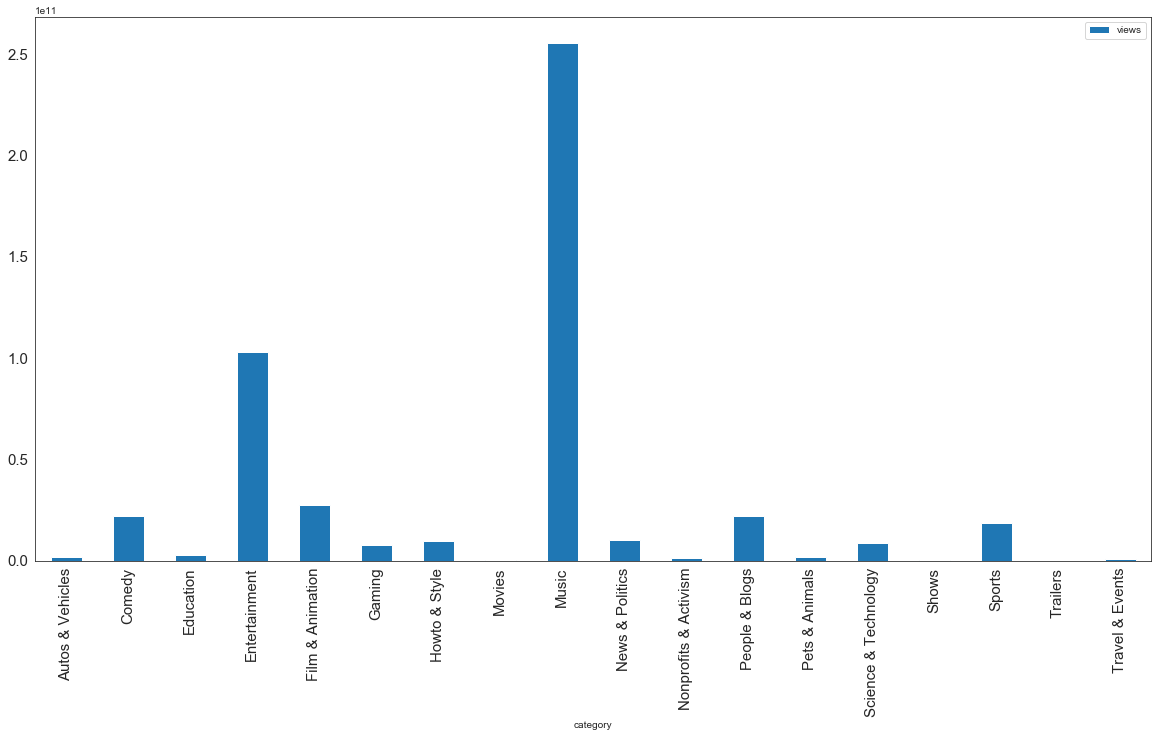

In [317]:
plt.figure()
aggregation3.plot(figsize=(20,10), rot=90, kind='bar', logy=False, fontsize=15)

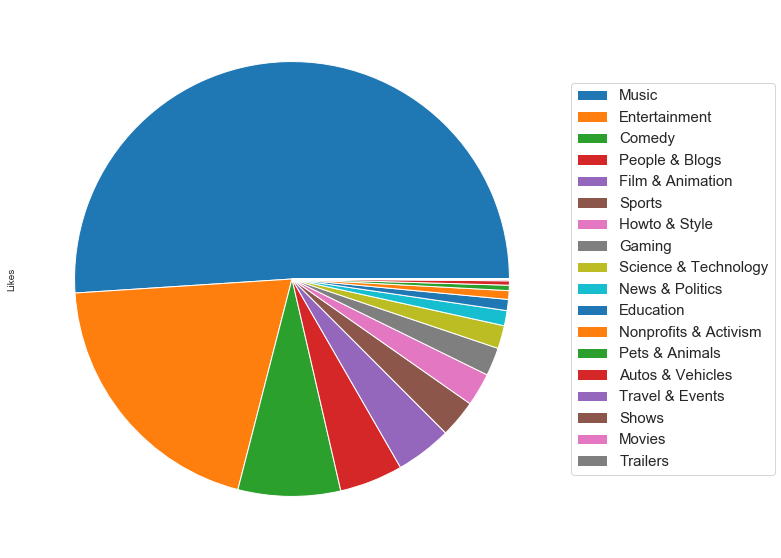

In [235]:
plt.figure()
aggregation4["likes"].sort_values(ascending=False).plot(figsize=(20,10), rot=90, kind='pie', logy=False, fontsize=15, labels=['' for i in range(18)])
plt.ylabel("Likes")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels=aggregation4["likes"].sort_values(ascending=False).index, fontsize=15)


# Country

In [294]:
aggregation3 = all_videos[["views", "country", "category"]].groupby([
    all_videos.country, all_videos.category], sort=True).sum()
aggregation4 = all_videos[["likes","dislikes","comment_count", "country", "category"]].groupby([
    all_videos.country]).sum()

In [297]:
aggregation3 = all_videos[["views", "country", "category"]].groupby([all_videos.country, all_videos.category], sort=True).sum()
aggregation3 = aggregation3.reset_index()
aggregation3[(aggregation3.country =="US")].sort_values(by="views", ascending=False)

country               category        views
158      US                  Music  39975744623
154      US          Entertainment  20356044520
155      US       Film & Animation   7282640693
152      US                 Comedy   5097320527
161      US         People & Blogs   4680325177
165      US                 Sports   4397476143
157      US          Howto & Style   4077720018
163      US   Science & Technology   3263200687
156      US                 Gaming   2125888809
159      US        News & Politics   1447482631
153      US              Education   1180261342
162      US         Pets & Animals    764585553
151      US       Autos & Vehicles    520475457
166      US        Travel & Events    343557084
160      US  Nonprofits & Activism    167872225
164      US                  Shows     51501058

In [266]:
aggregation3.sort_values(by="views", ascending=False)[(aggregation3.country == "US")]
aggregation3

AttributeError: 'DataFrame' object has no attribute 'country'

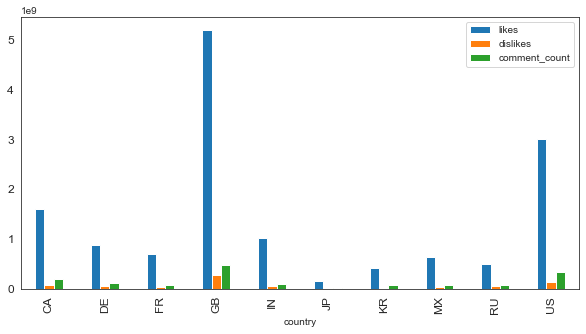

In [258]:
aggregation4[["likes","dislikes","comment_count"]].plot.bar(figsize=(10,5), fontsize=12)

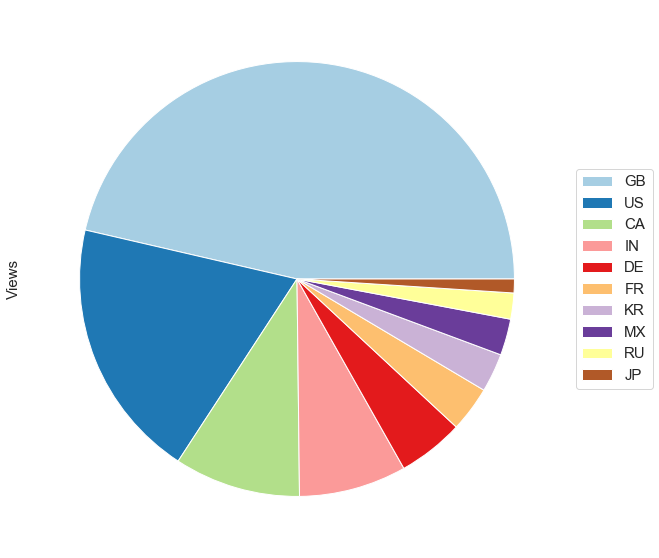

In [248]:
plt.figure()
aggregation3["views"].sort_values(ascending=False).plot(figsize=(20,10), rot=90, kind='pie', logy=False, 
        colormap="Paired",fontsize=15, labels=['' for i in range(18)])
plt.ylabel("Views", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels=aggregation3["views"].sort_values(ascending=False).index, fontsize=15)


# Data preprocessing

In [60]:
all_videos_without_most = all_videos.drop(['description', 'channel_title', 'title', "video_id", "category_id", "tags", 
                                          "comments_disabled", "ratings_disabled", "video_error_or_removed", "thumbnail_link", "publish_time"], axis=1)

In [61]:
all_videos_without_most

trending_date     views    likes  dislikes  comment_count country  \
0           17.14.11  17158579   787425     43420         125882      CA   
1           17.14.11   1014651   127794      1688          13030      CA   
2           17.14.11   3191434   146035      5339           8181      CA   
3           17.14.11   2095828   132239      1989          17518      CA   
4           17.14.11  33523622  1634130     21082          85067      CA   
...              ...       ...      ...       ...            ...     ...   
356459      18.14.06   8259128   645888      4052          62610      US   
356460      18.14.06   1685609    38160      1385           2657      US   
356461      18.14.06   1066451    48068      1032           3992      US   
356462      18.14.06   5660813   192957      2846          13088      US   
356463      18.14.06  10306119   357079    212976         144795      US   

                category  
0                  Music  
1                 Comedy  
2                 Comedy  
3          Entertainment  
4                  Music  
...                  ...  
356459    People & Blogs  
356460    Pets & Animals  
356461     Entertainment  
356462  Film & Animation  
356463            Gaming  

[356464 rows x 7 columns]

In [62]:
all_videos_without_most.to_json("all_videos_without_most.json")

# Aggregation

In [129]:
month_group = all_videos_without_most.groupby([all_videos_without_most.trending_date.str[6:8], "category", "country"])

In [137]:
month_group.sum().to_json("month_cat_country.json", orient="index")

In [131]:
month_group.sum()

views   likes  dislikes  \
trending_date category         country                               
01            Autos & Vehicles CA       25426009  502668     12814   
                               DE       31363333  681381     16236   
                               FR        4504047  131641      6175   
                               GB       76955154  971831     20580   
                               IN         738735    9793      1032   
...                                          ...     ...       ...   
12            Travel & Events  IN         381370     883       152   
                               KR        4065343   54434      1722   
                               MX        1619437  106654      2767   
                               RU        3165483   90945     10924   
                               US       32783319  462119    119904   

                                        comment_count  
trending_date category         country                 
01            Autos & Vehicles CA              106631  
                               DE               71582  
                               FR               17491  
                               GB              148787  
                               IN                1609  
...                                               ...  
12            Travel & Events  IN                  64  
                               KR               16089  
                               MX               12065  
                               RU               25780  
                               US              163625  

[1199 rows x 4 columns]

In [138]:
all_videos_without_most["category"].unique()

array(['Music', 'Comedy', 'Entertainment', 'News & Politics',
       'People & Blogs', 'Howto & Style', 'Film & Animation',
       'Science & Technology', 'Gaming', 'Sports',
       'Nonprofits & Activism', 'Pets & Animals', 'Travel & Events',
       'Autos & Vehicles', 'Education', 'Shows', 'Movies', 'Trailers'],
      dtype=object)

# Read all video

In [42]:
all_videos_new = pd.read_json("all_videos_for_word_cloud.json")

In [306]:
all_videos

video_id trending_date  \
0       n1WpP7iowLc      17.14.11   
1       0dBIkQ4Mz1M      17.14.11   
2       5qpjK5DgCt4      17.14.11   
3       d380meD0W0M      17.14.11   
4       2Vv-BfVoq4g      17.14.11   
...             ...           ...   
356459  1PhPYr_9zRY      18.14.06   
356460  BZt0qjTWNhw      18.14.06   
356461  D6Oy4LfoqsU      18.14.06   
356462  oV0zkMe1K8s      18.14.06   
356463  ooyjaVdt-jA      18.14.06   

                                                    title  \
0              Eminem - Walk On Water (Audio) ft. Beyoncé   
1                           PLUSH - Bad Unboxing Fan Mail   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                                I Dare You: GOING BALD!?   
4             Ed Sheeran - Perfect (Official Music Video)   
...                                                   ...   
356459  BTS Plays With Puppies While Answering Fan Que...   
356460                       The Cat Who Caught the Laser   
356461  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
356462                How Black Panther Should Have Ended   
356463  Official Call of Duty®: Black Ops 4 — Multipla...   

                   channel_title  category_id              publish_time  \
0                     EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                      iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                   Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                       nigahiga           24  2017-11-12T18:01:41.000Z   
4                     Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                          ...          ...                       ...   
356459            BuzzFeed Celeb           22  2018-05-18T16:39:29.000Z   
356460             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
356461                Brad Mondo           24  2018-05-18T17:34:22.000Z   
356462  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
356463              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                     tags     views    likes  \
0       Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1       plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2       racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3       ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4       edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                   ...       ...      ...   
356459  BuzzFeed|"BuzzFeedVideo"|"Puppy Interview"|"pu...   8259128   645888   
356460  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
356461  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
356462  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
356463      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

        dislikes  comment_count  \
0          43420         125882   
1           1688          13030   
2           5339           8181   
3           1989          17518   
4          21082          85067   
...          ...            ...   
356459      4052          62610   
356460      1385           2657   
356461      1032           3992   
356462      2846          13088   
356463    212976         144795   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1       https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2       https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3       https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4       https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                                ...                ...   
356459  htt

In [302]:
for i in all_videos["category"]:
    print(i)

Music
Comedy
Comedy
Entertainment
Music
News & Politics
Comedy
People & Blogs
Entertainment
People & Blogs
Music
Howto & Style
Film & Animation
Music
Entertainment
People & Blogs
Comedy
Entertainment
Film & Animation
Film & Animation
Science & Technology
Entertainment
People & Blogs
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Music
People & Blogs
Entertainment
People & Blogs
Gaming
People & Blogs
News & Politics
Gaming
Entertainment
Entertainment
Comedy
Entertainment
Sports
People & Blogs
Nonprofits & Activism
Howto & Style
Film & Animation
Entertainment
Sports
Comedy
Music
People & Blogs
Comedy
News & Politics
Pets & Animals
Music
Music
Entertainment
Entertainment
People & Blogs
News & Politics
Entertainment
Music
Sports
Music
Entertainment
People & Blogs
Travel & Events
Music
Gaming
People & Blogs
News & Politics
Comedy
News & Politics
Comedy
Entertainment
Entertainment
News & Politics
Sports
Entertainment
News & Politics
Comedy
Entertainment

Shows
Education
Comedy
Entertainment
Gaming
Howto & Style
Entertainment
Gaming
Comedy
Science & Technology
Entertainment
Music
People & Blogs
Film & Animation
Entertainment
Music
Music
Comedy
Entertainment
Gaming
Comedy
Film & Animation
Entertainment
Pets & Animals
News & Politics
Comedy
Science & Technology
Entertainment
Comedy
Music
Entertainment
Education
Sports
Comedy
Film & Animation
People & Blogs
Entertainment
Entertainment
Comedy
People & Blogs
People & Blogs
Entertainment
Music
Comedy
News & Politics
Entertainment
Comedy
People & Blogs
Comedy
Shows
Sports
Entertainment
Entertainment
Entertainment
News & Politics
Music
Comedy
Film & Animation
People & Blogs
Entertainment
News & Politics
Entertainment
People & Blogs
Film & Animation
Entertainment
Entertainment
Education
Comedy
Nonprofits & Activism
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
News & Politics
Howto & Style
Autos & Vehicles
Howto & Style
Film & Animation
Entertainment
Come

Entertainment
Music
People & Blogs
Entertainment
Music
Entertainment
Sports
Pets & Animals
Entertainment
Entertainment
Gaming
News & Politics
Entertainment
Entertainment
Education
Education
Gaming
Entertainment
People & Blogs
Music
Entertainment
People & Blogs
Music
Entertainment
Entertainment
Travel & Events
Entertainment
Howto & Style
News & Politics
Music
Gaming
Entertainment
Howto & Style
Entertainment
Howto & Style
Howto & Style
Travel & Events
Entertainment
People & Blogs
Gaming
Entertainment
Sports
People & Blogs
Film & Animation
Gaming
Pets & Animals
Entertainment
Entertainment
Entertainment
People & Blogs
People & Blogs
Science & Technology
Comedy
Film & Animation
Howto & Style
Entertainment
News & Politics
Comedy
Entertainment
Sports
Comedy
Music
News & Politics
Entertainment
Travel & Events
Music
Entertainment
Music
Music
Gaming
Sports
Howto & Style
People & Blogs
Entertainment
Entertainment
Music
Entertainment
Comedy
Comedy
News & Politics
Autos & Vehicles
Sports
Gaming
Ent

Sports
Entertainment
Music
Entertainment
Film & Animation
Entertainment
Entertainment
Gaming
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Gaming
Entertainment
Comedy
Entertainment
Comedy
News & Politics
Entertainment
Education
Comedy
Music
Sports
Comedy
Pets & Animals
Gaming
Education
Comedy
Music
Gaming
People & Blogs
Entertainment
Sports
Howto & Style
Howto & Style
Sports
Music
Comedy
Entertainment
Comedy
Sports
Entertainment
Comedy
Howto & Style
Entertainment
Gaming
Howto & Style
Film & Animation
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
People & Blogs
News & Politics
Entertainment
Entertainment
Howto & Style
Entertainment
Entertainment
Science & Technology
Entertainment
News & Politics
People & Blogs
Entertainment
News & Politics
Entertainment
Pets & Animals
People & Blogs
Entertainment
People & Blogs
Entertainment
People & Blogs
Music
Education
Entertainment
News & Politics
Entertainment
People & Blogs
Entertainment
Ente

News & Politics
Entertainment
Travel & Events
News & Politics
Entertainment
Nonprofits & Activism
Film & Animation
Sports
Howto & Style
Howto & Style
Entertainment
Entertainment
Entertainment
Education
Entertainment
Music
Film & Animation
Entertainment
Howto & Style
Entertainment
News & Politics
Sports
Entertainment
People & Blogs
News & Politics
Howto & Style
Entertainment
News & Politics
Entertainment
News & Politics
Entertainment
People & Blogs
Sports
Comedy
Entertainment
Science & Technology
News & Politics
News & Politics
Entertainment
News & Politics
News & Politics
People & Blogs
Entertainment
Entertainment
News & Politics
Science & Technology
Howto & Style
Comedy
Music
Music
Music
Entertainment
News & Politics
Comedy
Music
Entertainment
Sports
News & Politics
Entertainment
Entertainment
Entertainment
Music
People & Blogs
Film & Animation
Sports
Entertainment
Film & Animation
Music
Entertainment
Film & Animation
Entertainment
Science & Technology
Entertainment
People & Blogs
Com

Sports
Film & Animation
Entertainment
Film & Animation
News & Politics
Music
Comedy
People & Blogs
Music
Entertainment
Howto & Style
People & Blogs
News & Politics
People & Blogs
Entertainment
Howto & Style
Howto & Style
Sports
People & Blogs
Gaming
Entertainment
Entertainment
Film & Animation
Music
Film & Animation
Comedy
Sports
Comedy
Film & Animation
Entertainment
Music
Entertainment
Comedy
Entertainment
News & Politics
Gaming
People & Blogs
People & Blogs
Gaming
Sports
Film & Animation
Gaming
Entertainment
News & Politics
Entertainment
Comedy
Education
People & Blogs
Entertainment
News & Politics
Entertainment
People & Blogs
Film & Animation
News & Politics
Comedy
Film & Animation
People & Blogs
Entertainment
Film & Animation
Entertainment
Education
People & Blogs
Entertainment
Sports
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Pets & Animals
Entertainment
Comedy
Film & Animation
Entertainment
Entertainment
Sports
Sports
Sports
People & Blogs
Entertainmen

Gaming
News & Politics
Entertainment
Entertainment
Science & Technology
People & Blogs
Science & Technology
Entertainment
Comedy
Film & Animation
Gaming
Travel & Events
Entertainment
Entertainment
Comedy
Sports
Sports
Entertainment
People & Blogs
Entertainment
Sports
Howto & Style
Comedy
Sports
Comedy
News & Politics
Entertainment
Sports
Music
People & Blogs
Entertainment
Entertainment
News & Politics
People & Blogs
Entertainment
News & Politics
Education
Music
Comedy
Entertainment
Entertainment
Music
Howto & Style
Sports
Entertainment
Entertainment
Film & Animation
Pets & Animals
Entertainment
Science & Technology
People & Blogs
Sports
People & Blogs
News & Politics
Howto & Style
Music
News & Politics
Comedy
Entertainment
Film & Animation
Comedy
Film & Animation
Entertainment
Travel & Events
Entertainment
People & Blogs
Entertainment
Entertainment
Sports
Entertainment
Music
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainme

Entertainment
Entertainment
Howto & Style
News & Politics
Sports
News & Politics
Education
Howto & Style
Music
Entertainment
Music
People & Blogs
Comedy
People & Blogs
Music
Entertainment
Sports
News & Politics
Entertainment
Gaming
Howto & Style
Entertainment
Entertainment
Science & Technology
Entertainment
Education
Entertainment
Comedy
Gaming
Film & Animation
Comedy
Entertainment
Entertainment
Entertainment
Sports
Comedy
News & Politics
Education
Autos & Vehicles
Entertainment
Education
Gaming
People & Blogs
Comedy
Entertainment
Entertainment
Comedy
Comedy
Sports
Gaming
Entertainment
Entertainment
Sports
News & Politics
Autos & Vehicles
Entertainment
Film & Animation
Howto & Style
People & Blogs
People & Blogs
Entertainment
People & Blogs
News & Politics
Entertainment
Music
Music
People & Blogs
Comedy
Music
Entertainment
Entertainment
Music
Film & Animation
Film & Animation
Entertainment
News & Politics
Howto & Style
Sports
Entertainment
Music
Sports
Entertainment
Entertainment
News 

Education
Entertainment
Film & Animation
Sports
People & Blogs
Entertainment
People & Blogs
News & Politics
Comedy
People & Blogs
Education
Howto & Style
Sports
News & Politics
Film & Animation
Music
Entertainment
Howto & Style
Music
Comedy
Howto & Style
Gaming
News & Politics
Entertainment
Pets & Animals
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Music
Sports
News & Politics
Entertainment
Entertainment
People & Blogs
Sports
Entertainment
Entertainment
Gaming
Education
Entertainment
Comedy
People & Blogs
Entertainment
Nonprofits & Activism
People & Blogs
Entertainment
Pets & Animals
People & Blogs
Music
Comedy
Entertainment
Howto & Style
People & Blogs
Film & Animation
Education
Education
Howto & Style
News & Politics
Film & Animation
Sports
Entertainment
Entertainment
Sports
Sports
Comedy
Film & Animation
Education
Sports
People & Blogs
Autos & Vehicles
Entertainment
Comedy
Science & Technology
Pets & Animals
Film & Animation
Gaming
Education

Autos & Vehicles
Entertainment
Education
Entertainment
Gaming
Film & Animation
Entertainment
Pets & Animals
Music
Film & Animation
Music
Sports
Pets & Animals
People & Blogs
News & Politics
Sports
Entertainment
Howto & Style
News & Politics
Film & Animation
Film & Animation
People & Blogs
Entertainment
Comedy
Howto & Style
People & Blogs
Entertainment
People & Blogs
News & Politics
Entertainment
Comedy
Entertainment
Entertainment
Comedy
Film & Animation
News & Politics
Comedy
Comedy
Howto & Style
People & Blogs
Music
People & Blogs
People & Blogs
Entertainment
News & Politics
People & Blogs
Film & Animation
Comedy
Entertainment
Howto & Style
Music
Entertainment
Howto & Style
People & Blogs
Music
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Film & Animation
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Comedy
Film & Animation
Music
Science & Technology
Entertainment
Entertainment
Gaming
Entertainment
People

Comedy
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Music
Sports
Comedy
Travel & Events
News & Politics
Film & Animation
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Pets & Animals
Education
Music
Music
News & Politics
Entertainment
Autos & Vehicles
Entertainment
News & Politics
News & Politics
Sports
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Music
Howto & Style
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Film & Animation
Music
Music
Film & Animation
Entertainment
Entertainment
People & Blogs
Pets & Animals
Sports
Entertainment
Entertainment
People & Blogs
Entertainment
News & Politics
Film & Animation
Entertainment
Music
Comedy
Education
Entertainment
People & Blogs
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
People & Blogs
People & Blogs
Music
Howto & Style
Music
People & Blogs
Howto & Style
Science & Technology
Gaming
Ent

Howto & Style
Comedy
Music
Entertainment
Entertainment
Music
Education
People & Blogs
Entertainment
People & Blogs
Film & Animation
Comedy
News & Politics
Entertainment
People & Blogs
Entertainment
People & Blogs
Entertainment
Music
Sports
Comedy
People & Blogs
Film & Animation
Entertainment
Howto & Style
Sports
Entertainment
Sports
Film & Animation
Music
News & Politics
Entertainment
Entertainment
Entertainment
Music
Comedy
Entertainment
News & Politics
Comedy
People & Blogs
People & Blogs
Howto & Style
People & Blogs
Music
Music
Comedy
Education
Entertainment
Comedy
Education
Entertainment
People & Blogs
News & Politics
Film & Animation
Education
Sports
Gaming
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Gaming
Entertainment
Entertainment
News & Politics
People & Blogs
News & Politics
Entertainment
Howto & Style
Sports
Entertainment
Entertainment
Howto & Style
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainm

People & Blogs
Sports
News & Politics
Howto & Style
People & Blogs
Autos & Vehicles
Entertainment
News & Politics
Science & Technology
Science & Technology
Entertainment
Entertainment
Entertainment
Film & Animation
Sports
Film & Animation
Sports
Sports
Howto & Style
Film & Animation
News & Politics
People & Blogs
Entertainment
News & Politics
Howto & Style
Entertainment
Music
Entertainment
Entertainment
Entertainment
News & Politics
People & Blogs
Entertainment
Entertainment
Sports
Film & Animation
Comedy
Entertainment
People & Blogs
Entertainment
Entertainment
Pets & Animals
News & Politics
People & Blogs
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Sports
Howto & Style
Howto & Style
Howto & Style
Entertainment
Entertainment
Howto & Style
Entertainment
People & Blogs
Entertainment
Howto & Style
People & Blogs
Music
Howto & Style
Education
Music
Howto & Style
Travel & Events
News & Politics
News & Politics
Entertainment
Howto & Style
Entertainment
Entertainm

Entertainment
Entertainment
People & Blogs
News & Politics
Film & Animation
Entertainment
Film & Animation
Film & Animation
Film & Animation
Entertainment
Education
Music
Entertainment
News & Politics
Music
Entertainment
Education
Gaming
Entertainment
Science & Technology
Entertainment
Entertainment
Entertainment
Sports
Entertainment
Shows
Entertainment
News & Politics
Music
Entertainment
Music
Gaming
Entertainment
Entertainment
News & Politics
People & Blogs
Entertainment
Entertainment
Education
Comedy
Music
Music
Education
People & Blogs
Entertainment
Comedy
Entertainment
Science & Technology
News & Politics
Entertainment
People & Blogs
Comedy
Entertainment
Autos & Vehicles
Science & Technology
Music
Comedy
News & Politics
Entertainment
Gaming
News & Politics
Entertainment
Howto & Style
Entertainment
Entertainment
Comedy
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
Entertainment
Gaming
People & Blogs
Entertainment
Howto & Style
Science & Technology
Enterta

Entertainment
Music
Entertainment
Music
Music
Gaming
Music
Entertainment
Comedy
News & Politics
Entertainment
Music
Entertainment
Entertainment
Comedy
Entertainment
People & Blogs
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Entertainment
Comedy
News & Politics
People & Blogs
Music
Science & Technology
Comedy
Music
Entertainment
People & Blogs
Entertainment
Music
Film & Animation
News & Politics
Entertainment
News & Politics
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
News & Politics
Howto & Style
News & Politics
News & Politics
Film & Animation
Science & Technology
Music
Sports
Music
Entertainment
Howto & Style
Entertainment
Music
Education
Movies
Entertainment
Music
Comedy
Entertainment
Sports
Entertainment
Sports
Travel & Events
News & Politics
News & Politics
People & Blogs
Sports
Entertainment
Science & Technology
People & Blogs
News & Politics
Music
Entertainment
Film & Animation
Entertainment
Entertainment

Film & Animation
Entertainment
Comedy
Gaming
Howto & Style
Music
People & Blogs
People & Blogs
Pets & Animals
Entertainment
Gaming
Entertainment
Entertainment
Entertainment
Entertainment
Travel & Events
Howto & Style
Film & Animation
Entertainment
Education
Gaming
News & Politics
Comedy
Entertainment
Entertainment
Entertainment
Howto & Style
Entertainment
Howto & Style
Sports
News & Politics
Entertainment
News & Politics
Comedy
Gaming
Howto & Style
Howto & Style
News & Politics
Entertainment
Sports
Sports
Entertainment
Howto & Style
Music
Entertainment
Howto & Style
Entertainment
People & Blogs
Gaming
Howto & Style
Education
Entertainment
Gaming
Entertainment
Sports
Pets & Animals
Entertainment
Entertainment
News & Politics
Entertainment
News & Politics
Sports
Howto & Style
Gaming
Entertainment
Comedy
Comedy
Travel & Events
Sports
Autos & Vehicles
News & Politics
Sports
Sports
Comedy
Comedy
Entertainment
Entertainment
People & Blogs
News & Politics
Science & Technology
Entertainment
Pe

Howto & Style
People & Blogs
Music
Entertainment
Entertainment
People & Blogs
Sports
Film & Animation
Gaming
Film & Animation
Entertainment
Comedy
Comedy
Film & Animation
People & Blogs
Sports
Entertainment
People & Blogs
Music
Pets & Animals
Comedy
People & Blogs
Comedy
Music
News & Politics
Film & Animation
Comedy
People & Blogs
Education
Sports
Entertainment
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
Gaming
People & Blogs
Sports
Entertainment
Entertainment
Entertainment
Film & Animation
Pets & Animals
People & Blogs
Sports
Entertainment
Entertainment
Film & Animation
Howto & Style
Sports
News & Politics
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Film & Animation
People & Blogs
Gaming
Entertainment
News & Politics
Sports
Entertainment
Gaming
Entertainment
Gaming
Autos & Vehicles
Sports
Entertainment
Gaming
Autos & Vehicles
Entertainment
Entertainment
Sports
Sports
People & Blogs


People & Blogs
Entertainment
Entertainment
People & Blogs
People & Blogs
Film & Animation
Comedy
Sports
Entertainment
Gaming
Gaming
People & Blogs
Gaming
Film & Animation
Gaming
Entertainment
People & Blogs
Entertainment
Film & Animation
Entertainment
Entertainment
Science & Technology
Entertainment
Pets & Animals
Film & Animation
Music
Sports
Entertainment
Entertainment
People & Blogs
Sports
Entertainment
Entertainment
People & Blogs
Comedy
Film & Animation
Entertainment
News & Politics
Howto & Style
Entertainment
Film & Animation
Howto & Style
Travel & Events
Entertainment
Education
Entertainment
Entertainment
Entertainment
Gaming
Film & Animation
Entertainment
Entertainment
Film & Animation
Education
Howto & Style
People & Blogs
Entertainment
Sports
Comedy
People & Blogs
Entertainment
Entertainment
Entertainment
Sports
Entertainment
Entertainment
Entertainment
Howto & Style
Sports
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
Entertainment
Music
Music
Come

Music
Sports
People & Blogs
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Comedy
Gaming
Entertainment
Entertainment
News & Politics
Entertainment
News & Politics
Film & Animation
Sports
People & Blogs
Entertainment
Entertainment
Film & Animation
Comedy
Entertainment
Entertainment
Sports
Comedy
Entertainment
Sports
Entertainment
Science & Technology
Entertainment
People & Blogs
Howto & Style
People & Blogs
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
People & Blogs
Autos & Vehicles
Entertainment
People & Blogs
Education
People & Blogs
Music
News & Politics
Nonprofits & Activism
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
Comedy
Entertainment
Gaming
Entertainment
Entertainment
Pets & Animals
Entertainment
Music
Film & Animation
Film & Animation
People & Blogs
People & Blogs
Entertainment
Music
Gaming
Ente

News & Politics
Autos & Vehicles
News & Politics
Gaming
Education
People & Blogs
Education
Entertainment
Entertainment
Music
News & Politics
Howto & Style
People & Blogs
News & Politics
Sports
Entertainment
Film & Animation
Comedy
Entertainment
Gaming
Pets & Animals
News & Politics
Entertainment
Sports
Film & Animation
Comedy
Entertainment
Entertainment
Entertainment
Howto & Style
Entertainment
News & Politics
People & Blogs
People & Blogs
Comedy
Comedy
Comedy
Sports
Entertainment
Entertainment
News & Politics
People & Blogs
Sports
People & Blogs
Howto & Style
Entertainment
Travel & Events
Entertainment
Film & Animation
Entertainment
People & Blogs
Comedy
People & Blogs
Howto & Style
Sports
Music
Comedy
Entertainment
People & Blogs
Entertainment
Autos & Vehicles
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Education
News & Politics
News & Politics
Howto & Style
Howto & Style
News & Politics
People & Blogs
Education
News & Poli

Entertainment
People & Blogs
Gaming
Sports
Comedy
Entertainment
Entertainment
People & Blogs
News & Politics
Howto & Style
Sports
Film & Animation
Education
Comedy
Comedy
Howto & Style
Film & Animation
Music
Entertainment
Entertainment
News & Politics
Entertainment
Science & Technology
Entertainment
Entertainment
Howto & Style
Sports
Entertainment
Entertainment
People & Blogs
News & Politics
People & Blogs
People & Blogs
Entertainment
Science & Technology
Comedy
News & Politics
Entertainment
Howto & Style
Entertainment
Gaming
Music
Film & Animation
People & Blogs
Gaming
People & Blogs
People & Blogs
Entertainment
Howto & Style
News & Politics
Music
Autos & Vehicles
Music
Film & Animation
Comedy
Comedy
Entertainment
Entertainment
Entertainment
Sports
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Howto & Style
Film & Animation
Entertainment
Film & Animation
Comedy
Sports
Entertainment
Ne

News & Politics
Howto & Style
People & Blogs
Entertainment
Sports
Comedy
Sports
News & Politics
Entertainment
People & Blogs
Music
Entertainment
Comedy
Music
News & Politics
News & Politics
People & Blogs
Entertainment
Science & Technology
Entertainment
News & Politics
Entertainment
Entertainment
Howto & Style
Autos & Vehicles
People & Blogs
Howto & Style
Entertainment
Music
News & Politics
Film & Animation
Entertainment
People & Blogs
Comedy
Education
People & Blogs
Entertainment
Shows
Pets & Animals
Entertainment
Entertainment
Sports
Sports
Education
News & Politics
News & Politics
Entertainment
Entertainment
Entertainment
Film & Animation
News & Politics
Gaming
Entertainment
Entertainment
Entertainment
Sports
Travel & Events
People & Blogs
Entertainment
People & Blogs
Entertainment
People & Blogs
Entertainment
Gaming
People & Blogs
People & Blogs
Sports
People & Blogs
Film & Animation
Sports
Entertainment
Entertainment
News & Politics
Education
Howto & Style
Entertainment
Entertainm

Entertainment
Music
People & Blogs
Entertainment
Education
News & Politics
Entertainment
Comedy
Gaming
News & Politics
News & Politics
People & Blogs
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
Education
News & Politics
Film & Animation
News & Politics
News & Politics
Sports
Sports
News & Politics
Nonprofits & Activism
Howto & Style
Entertainment
Comedy
Comedy
News & Politics
Entertainment
Entertainment
Science & Technology
Science & Technology
Comedy
Gaming
Entertainment
Pets & Animals
Entertainment
Entertainment
Pets & Animals
Entertainment
Entertainment
Science & Technology
People & Blogs
Science & Technology
Entertainment
Film & Animation
Autos & Vehicles
Entertainment
People & Blogs
Gaming
Entertainment
Entertainment
Music
Entertainment
News & Politics
Entertainment
News & Politics
Sports
Education
Entertainment
People & Blogs
Autos & Vehicles
Sports
People & Blogs
Film & Animation
News & Politics
Howto & Style
Sports
Entertainment
People & Blogs
Sports

Comedy
Gaming
Gaming
Music
Comedy
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Comedy
Gaming
Gaming
Music
Entertainment
Gaming
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Music
Sports
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
News & Politics
People & Blogs
Gaming
Music
Film & Animation
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Gaming
Nonprofits & Activism
People & Blogs
Entertainment
Music
Entertainment
Gaming
Education
Entertainment
Autos & Vehicles
Sports
Entertainment
Gaming
Entertainment
Comedy
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Howto & Style
Entertainment
People & Blogs
Sports
Howto & Style
People & Blogs
Gaming
Film & Animation
Sports
Comedy
Film & Animation
News & Politics
Music
Howto & Style
Entertainment
News & Politics
Enterta

Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Howto & Style
Entertainment
Sports
Entertainment
Gaming
News & Politics
Howto & Style
Entertainment
People & Blogs
Gaming
Entertainment
News & Politics
Entertainment
Entertainment
News & Politics
Music
Film & Animation
Entertainment
Entertainment
Comedy
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Autos & Vehicles
Entertainment
Entertainment
Entertainment
Music
News & Politics
Entertainment
Comedy
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Gaming
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Comedy
Entertainment
Comedy
Entertainment
Comedy
People & Blogs
Howto & Style
Sports
Entertainment
Entertainment
Entertainment
People & Blogs
News & Politics
Entertainment
Music
Film & Animation
Music
Comedy
Entertainment
Entertainment
Entertainment
People & Blogs
Education
News & Politics
Entertainm

Gaming
People & Blogs
People & Blogs
Entertainment
News & Politics
Entertainment
Sports
Autos & Vehicles
News & Politics
Music
Sports
Sports
Entertainment
Sports
News & Politics
Entertainment
Howto & Style
Entertainment
Entertainment
People & Blogs
Sports
News & Politics
News & Politics
Comedy
Entertainment
People & Blogs
Entertainment
People & Blogs
Entertainment
Entertainment
Film & Animation
Entertainment
Comedy
Music
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
Entertainment
Sports
Music
People & Blogs
People & Blogs
Autos & Vehicles
People & Blogs
Music
People & Blogs
Music
Music
Gaming
Entertainment
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
Howto & Style
People & Blogs
People & Blogs
Comedy
Music
Comedy
People & Blogs
Comedy
Gaming
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Autos & Vehicles
Entertainment
Comedy
News & Politics
People & Blogs
Comedy
Entertainment
Music
Sports
Entertainment
Nonprofits &

Comedy
Entertainment
News & Politics
People & Blogs
Comedy
News & Politics
Entertainment
Education
Autos & Vehicles
Entertainment
Howto & Style
Entertainment
People & Blogs
People & Blogs
People & Blogs
Comedy
Science & Technology
Gaming
Entertainment
People & Blogs
People & Blogs
Entertainment
People & Blogs
Comedy
Entertainment
News & Politics
Entertainment
Film & Animation
Education
Sports
Entertainment
People & Blogs
Entertainment
Comedy
Sports
Music
People & Blogs
Autos & Vehicles
Entertainment
Entertainment
Entertainment
Film & Animation
Music
Entertainment
Entertainment
Entertainment
Gaming
Entertainment
Entertainment
Music
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
People & Blogs
Comedy
Entertainment
People & Blogs
Sports
People & Blogs
Howto & Style
Entertainment
Music
Entertainment
Entertainment
Entertainment
Howto & Style
People & Blogs
Music
Music


Entertainment
Sports
People & Blogs
Music
Entertainment
Entertainment
Science & Technology
Sports
Film & Animation
Science & Technology
People & Blogs
Entertainment
Music
Education
Entertainment
Entertainment
Gaming
People & Blogs
Sports
Howto & Style
Sports
Science & Technology
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Comedy
Entertainment
Entertainment
People & Blogs
Comedy
Music
Music
People & Blogs
Howto & Style
Entertainment
Music
Music
Entertainment
People & Blogs
Autos & Vehicles
Sports
Entertainment
Entertainment
People & Blogs
Gaming
Comedy
Autos & Vehicles
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Science & Technology
Entertainment
Music
Comedy
Comedy
Entertainment
Entertainment
People & Blogs
Education
Entertainment
Entertainment
Film & Animation
Entertainment
Gaming
Entertainment
Music
Gaming
Entertainment
People & Blogs
News & Politics
Sports
Entertainment

Sports
People & Blogs
Education
Howto & Style
Entertainment
Entertainment
Entertainment
Sports
News & Politics
Entertainment
Sports
News & Politics
Gaming
Pets & Animals
Entertainment
People & Blogs
Entertainment
Sports
Film & Animation
Entertainment
Sports
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Film & Animation
Autos & Vehicles
Sports
People & Blogs
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Music
Sports
Howto & Style
Entertainment
Entertainment
News & Politics
News & Politics
People & Blogs
Film & Animation
People & Blogs
Entertainment
Sports
Gaming
Entertainment
People & Blogs
News & Politics
Entertainment
Entertainment
Education
News & Politics
Sports
Entertainment
Entertainment
Autos & Vehicles
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
People & Blogs
Howto & Style
Film & Animation
Film & Animation
Entertainment
News & Politics
Entertai

Entertainment
People & Blogs
People & Blogs
People & Blogs
Education
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Howto & Style
Sports
Sports
Film & Animation
Gaming
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Music
Howto & Style
Autos & Vehicles
Entertainment
Sports
News & Politics
Entertainment
Comedy
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Autos & Vehicles
News & Politics
People & Blogs
Entertainment
Education
Autos & Vehicles
Sports
Film & Animation
Entertainment
Entertainment
Pets & Animals
People & Blogs
People & Blogs
Howto & Style
News & Politics
People & Blogs
Entertainment
Entertainment
Entertainment
People & Blogs
Film & Animation
People & Blogs
News & Politics
Entertainment
Gaming
Entertainment
Film & Animation
Gaming
Entertainment
News & Politics
Entertainment
Gaming
Entertainment
People & Blogs
Film & Animation
People & Blogs
Autos 

News & Politics
Comedy
Pets & Animals
Comedy
News & Politics
People & Blogs
Entertainment
Entertainment
Comedy
Autos & Vehicles
Entertainment
Entertainment
People & Blogs
Nonprofits & Activism
Education
Film & Animation
People & Blogs
News & Politics
Howto & Style
Sports
Comedy
Education
Comedy
Science & Technology
Science & Technology
Entertainment
Entertainment
Sports
Howto & Style
Entertainment
News & Politics
Sports
Entertainment
Gaming
People & Blogs
Gaming
Entertainment
Entertainment
Sports
Music
Entertainment
Sports
Science & Technology
Entertainment
Sports
Howto & Style
Sports
Howto & Style
Howto & Style
Entertainment
People & Blogs
Film & Animation
People & Blogs
Entertainment
People & Blogs
Sports
Howto & Style
Music
Film & Animation
Entertainment
Autos & Vehicles
Entertainment
Music
Music
Film & Animation
Comedy
Comedy
Entertainment
Howto & Style
Autos & Vehicles
Entertainment
Education
People & Blogs
News & Politics
Music
Music
Sports
People & Blogs
Pets & Animals
People & 

Entertainment
Entertainment
People & Blogs
Gaming
Music
News & Politics
Entertainment
Film & Animation
Education
Entertainment
News & Politics
Nonprofits & Activism
Entertainment
Comedy
Sports
Nonprofits & Activism
Film & Animation
Autos & Vehicles
Music
Gaming
Comedy
Music
Howto & Style
Nonprofits & Activism
News & Politics
People & Blogs
Entertainment
Comedy
People & Blogs
Howto & Style
Film & Animation
Entertainment
People & Blogs
People & Blogs
Entertainment
Howto & Style
Education
Entertainment
Entertainment
People & Blogs
Entertainment
Sports
People & Blogs
Howto & Style
People & Blogs
Sports
Entertainment
Entertainment
Sports
Entertainment
Gaming
Entertainment
Comedy
Gaming
Sports
People & Blogs
News & Politics
News & Politics
People & Blogs
Gaming
News & Politics
Comedy
People & Blogs
People & Blogs
Film & Animation
Science & Technology
Film & Animation
News & Politics
Entertainment
Howto & Style
Science & Technology
News & Politics
News & Politics
Gaming
News & Politics
Comedy

Entertainment
Music
Gaming
Entertainment
Entertainment
People & Blogs
Howto & Style
Comedy
Sports
News & Politics
Howto & Style
Entertainment
Science & Technology
Comedy
Music
News & Politics
Entertainment
Film & Animation
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Gaming
News & Politics
News & Politics
People & Blogs
Gaming
Music
Education
Education
Film & Animation
Entertainment
Sports
Music
News & Politics
Education
Entertainment
Sports
Howto & Style
News & Politics
Entertainment
People & Blogs
Entertainment
Comedy
Howto & Style
Music
Entertainment
People & Blogs
Howto & Style
Comedy
Autos & Vehicles
Music
Entertainment
Film & Animation
Entertainment
Travel & Events
News & Politics
News & Politics
People & Blogs
Gaming
Howto & Style
Entertainment
Music
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Sports
Music
News & Politics
Entertainment
Comedy
Gaming


Entertainment
Sports
Sports
Science & Technology
Entertainment
News & Politics
News & Politics
Sports
Comedy
Sports
News & Politics
Entertainment
Autos & Vehicles
Sports
Sports
Entertainment
Entertainment
Comedy
Music
Music
Music
Howto & Style
Entertainment
News & Politics
People & Blogs
People & Blogs
People & Blogs
Howto & Style
News & Politics
Howto & Style
Sports
Gaming
Howto & Style
Entertainment
People & Blogs
News & Politics
News & Politics
Entertainment
News & Politics
Entertainment
Howto & Style
Entertainment
Entertainment
Education
Music
Entertainment
Autos & Vehicles
People & Blogs
Entertainment
Gaming
Entertainment
People & Blogs
Film & Animation
News & Politics
Entertainment
Science & Technology
Education
Music
News & Politics
Entertainment
Music
Comedy
Comedy
Entertainment
Entertainment
News & Politics
Music
Comedy
Music
Comedy
Entertainment
People & Blogs
Entertainment
Howto & Style
Sports
News & Politics
Music
Comedy
News & Politics
News & Politics
Howto & Style
Music
H

Gaming
Music
Film & Animation
Entertainment
Comedy
Entertainment
Music
News & Politics
Film & Animation
Sports
Sports
Music
Music
Comedy
Comedy
Music
Entertainment
Comedy
Film & Animation
Film & Animation
Comedy
Gaming
Entertainment
Gaming
People & Blogs
Entertainment
News & Politics
People & Blogs
Film & Animation
Sports
Comedy
Entertainment
Entertainment
Film & Animation
Sports
People & Blogs
News & Politics
Sports
Entertainment
Entertainment
Sports
People & Blogs
News & Politics
Autos & Vehicles
News & Politics
Entertainment
Sports
Entertainment
Entertainment
Entertainment
Comedy
Music
Howto & Style
Education
Comedy
Entertainment
Entertainment
Sports
Comedy
News & Politics
Entertainment
Entertainment
Comedy
Sports
Film & Animation
Comedy
Comedy
Comedy
Gaming
Comedy
Sports
Sports
Comedy
News & Politics
Howto & Style
Film & Animation
Comedy
Sports
Music
Entertainment
News & Politics
Gaming
Gaming
People & Blogs
People & Blogs
Sports
Music
Entertainment
Music
Entertainment
Comedy
Gamin

Gaming
Film & Animation
Comedy
Entertainment
Music
Shows
People & Blogs
People & Blogs
Film & Animation
Comedy
Entertainment
Comedy
News & Politics
Howto & Style
Entertainment
Film & Animation
Entertainment
Entertainment
People & Blogs
People & Blogs
Music
Music
Entertainment
Howto & Style
Howto & Style
Comedy
News & Politics
Sports
Sports
Entertainment
Music
Comedy
Music
Entertainment
Howto & Style
Music
Autos & Vehicles
Autos & Vehicles
Howto & Style
Sports
News & Politics
People & Blogs
Entertainment
Entertainment
Comedy
Entertainment
People & Blogs
News & Politics
Science & Technology
Music
Howto & Style
Autos & Vehicles
Education
Pets & Animals
Sports
Sports
Entertainment
Autos & Vehicles
Autos & Vehicles
Entertainment
Entertainment
Entertainment
Comedy
Howto & Style
Comedy
People & Blogs
Comedy
People & Blogs
News & Politics
Howto & Style
People & Blogs
News & Politics
News & Politics
Music
Entertainment
Entertainment
Entertainment
Gaming
Film & Animation
Comedy
People & Blogs
Ne

Film & Animation
News & Politics
Entertainment
Music
News & Politics
Music
Howto & Style
People & Blogs
Education
People & Blogs
People & Blogs
Entertainment
Pets & Animals
People & Blogs
Education
People & Blogs
Entertainment
People & Blogs
People & Blogs
Entertainment
Entertainment
News & Politics
Autos & Vehicles
News & Politics
People & Blogs
Sports
Entertainment
Howto & Style
Sports
Entertainment
Entertainment
People & Blogs
Entertainment
Sports
Sports
People & Blogs
Entertainment
Sports
Comedy
Comedy
Entertainment
Science & Technology
People & Blogs
Gaming
News & Politics
Sports
Music
News & Politics
People & Blogs
Entertainment
Comedy
Entertainment
Music
Entertainment
Entertainment
Entertainment
Music
People & Blogs
News & Politics
Howto & Style
Comedy
Entertainment
Entertainment
People & Blogs
Gaming
Entertainment
Sports
Comedy
Music
Entertainment
Education
Comedy
Science & Technology
Comedy
People & Blogs
Sports
Music
Music
Entertainment
Comedy
Gaming
Music
Music
Entertainment

People & Blogs
Entertainment
People & Blogs
Music
Howto & Style
Entertainment
Music
Howto & Style
Comedy
Sports
Entertainment
People & Blogs
Entertainment
Sports
Film & Animation
Film & Animation
Entertainment
Howto & Style
Autos & Vehicles
Entertainment
Entertainment
Comedy
Howto & Style
Entertainment
News & Politics
Autos & Vehicles
Autos & Vehicles
Film & Animation
People & Blogs
Music
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Comedy
Comedy
Entertainment
Comedy
Entertainment
Sports
Comedy
People & Blogs
Comedy
Entertainment
Sports
Education
Entertainment
Comedy
Howto & Style
Entertainment
Comedy
People & Blogs
Entertainment
People & Blogs
Entertainment
News & Politics
People & Blogs
Film & Animation
Music
People & Blogs
People & Blogs
Comedy
Sports
Entertainment
Sports
People & Blogs
Comedy
Entertainment
Sports
Comedy
Comedy
Music
Film & Animation
News & Politics
Music
Music
Entertainment
Film & Animation
Entertainment
Gaming
Entertainment
Autos & Vehicl

People & Blogs
People & Blogs
Howto & Style
Sports
Sports
Comedy
News & Politics
Howto & Style
Music
People & Blogs
Gaming
Comedy
Entertainment
Entertainment
Entertainment
Sports
Music
Entertainment
News & Politics
News & Politics
Entertainment
People & Blogs
Sports
Howto & Style
News & Politics
Sports
Sports
Howto & Style
Howto & Style
People & Blogs
People & Blogs
Music
Film & Animation
Music
Autos & Vehicles
Comedy
Entertainment
People & Blogs
News & Politics
Sports
Entertainment
Entertainment
Music
Music
Film & Animation
Entertainment
People & Blogs
People & Blogs
People & Blogs
Entertainment
People & Blogs
Entertainment
Autos & Vehicles
Entertainment
Film & Animation
People & Blogs
Entertainment
News & Politics
Entertainment
People & Blogs
Howto & Style
Howto & Style
Comedy
Entertainment
Entertainment
People & Blogs
Autos & Vehicles
Education
Film & Animation
Music
Pets & Animals
Entertainment
Entertainment
Education
Entertainment
Music
Entertainment
Entertainment
Science & Techno

Entertainment
Comedy
Comedy
Entertainment
Comedy
Comedy
Gaming
Comedy
Sports
Entertainment
Sports
Howto & Style
Gaming
Entertainment
Education
News & Politics
Entertainment
Entertainment
Sports
Entertainment
Howto & Style
Entertainment
Music
Entertainment
Comedy
Entertainment
Sports
Entertainment
Entertainment
Entertainment
People & Blogs
Comedy
Sports
Music
Entertainment
Science & Technology
Gaming
Entertainment
People & Blogs
Entertainment
Gaming
News & Politics
News & Politics
People & Blogs
People & Blogs
Howto & Style
Music
Film & Animation
News & Politics
Entertainment
News & Politics
People & Blogs
Sports
Entertainment
Film & Animation
Science & Technology
Entertainment
Entertainment
Music
Comedy
Sports
Entertainment
Music
Sports
Film & Animation
Entertainment
People & Blogs
Sports
Comedy
Sports
Howto & Style
Comedy
Sports
Howto & Style
People & Blogs
Sports
Howto & Style
Entertainment
People & Blogs
Howto & Style
Howto & Style
Entertainment
News & Politics
Sports
People & Blogs

People & Blogs
People & Blogs
People & Blogs
Howto & Style
Gaming
Sports
Education
Film & Animation
Entertainment
Entertainment
Music
Entertainment
Entertainment
Howto & Style
Comedy
Science & Technology
Comedy
Howto & Style
Entertainment
News & Politics
Comedy
People & Blogs
Entertainment
Music
Music
Film & Animation
Entertainment
People & Blogs
Comedy
Entertainment
News & Politics
News & Politics
Music
People & Blogs
Music
Pets & Animals
Gaming
Howto & Style
Entertainment
Music
Howto & Style
People & Blogs
Entertainment
People & Blogs
Film & Animation
People & Blogs
Howto & Style
People & Blogs
Entertainment
Entertainment
Music
People & Blogs
Science & Technology
Entertainment
Entertainment
Sports
News & Politics
Music
People & Blogs
People & Blogs
Sports
Comedy
Comedy
News & Politics
Science & Technology
Gaming
Comedy
Comedy
Comedy
Music
Comedy
Film & Animation
Entertainment
Howto & Style
Music
Gaming
Howto & Style
Music
Music
Entertainment
Sports
Comedy
Autos & Vehicles
Howto & Sty

News & Politics
Shows
Sports
Entertainment
People & Blogs
News & Politics
Entertainment
Science & Technology
Movies
Comedy
Entertainment
Entertainment
Sports
Music
People & Blogs
Comedy
Music
People & Blogs
Sports
News & Politics
Sports
Entertainment
People & Blogs
Entertainment
Entertainment
Sports
Entertainment
Music
People & Blogs
Entertainment
Science & Technology
Entertainment
People & Blogs
Sports
People & Blogs
News & Politics
Entertainment
Entertainment
Film & Animation
Music
People & Blogs
Sports
Entertainment
People & Blogs
Comedy
News & Politics
Comedy
Howto & Style
News & Politics
Music
Howto & Style
Music
News & Politics
Howto & Style
Howto & Style
Entertainment
Howto & Style
Education
News & Politics
People & Blogs
Autos & Vehicles
Sports
Pets & Animals
Autos & Vehicles
Entertainment
Comedy
News & Politics
News & Politics
People & Blogs
Entertainment
Entertainment
News & Politics
Comedy
Comedy
People & Blogs
Entertainment
News & Politics
News & Politics
People & Blogs
Spo

Entertainment
Entertainment
Entertainment
Comedy
Sports
People & Blogs
Comedy
Sports
Music
Music
News & Politics
News & Politics
Sports
People & Blogs
Entertainment
Sports
Music
Entertainment
Pets & Animals
People & Blogs
Music
Entertainment
Comedy
Entertainment
People & Blogs
Entertainment
Film & Animation
Entertainment
Music
Music
Entertainment
Entertainment
Entertainment
Entertainment
Music
Autos & Vehicles
Music
Music
Film & Animation
Sports
Entertainment
News & Politics
Entertainment
Film & Animation
Entertainment
People & Blogs
Comedy
Music
Education
Sports
Comedy
Music
Film & Animation
People & Blogs
Howto & Style
Film & Animation
People & Blogs
Entertainment
Sports
People & Blogs
News & Politics
Education
Entertainment
Entertainment
Howto & Style
Music
People & Blogs
Comedy
Comedy
Sports
Film & Animation
People & Blogs
Sports
News & Politics
News & Politics
Education
Sports
Comedy
Comedy
Entertainment
Sports
Comedy
Entertainment
Entertainment
Music
Sports
Entertainment
Entertai

Science & Technology
Science & Technology
Comedy
Sports
Music
Entertainment
Autos & Vehicles
Entertainment
People & Blogs
Music
Entertainment
Comedy
Entertainment
Sports
Entertainment
Entertainment
People & Blogs
Film & Animation
Howto & Style
Entertainment
Education
Autos & Vehicles
Sports
Education
Entertainment
Gaming
Entertainment
News & Politics
Howto & Style
People & Blogs
Gaming
Entertainment
Music
Entertainment
Comedy
Music
Music
Pets & Animals
Comedy
Music
Howto & Style
Film & Animation
Entertainment
Entertainment
Nonprofits & Activism
Entertainment
Entertainment
Sports
Entertainment
Sports
Sports
Sports
Entertainment
Gaming
Comedy
Entertainment
Education
People & Blogs
Entertainment
Pets & Animals
Howto & Style
People & Blogs
Entertainment
Music
News & Politics
People & Blogs
People & Blogs
News & Politics
People & Blogs
Film & Animation
Entertainment
Howto & Style
Entertainment
Music
People & Blogs
Music
People & Blogs
Comedy
Music
People & Blogs
Entertainment
Howto & Style


Film & Animation
Howto & Style
Film & Animation
Entertainment
Science & Technology
Music
Howto & Style
Music
Sports
Gaming
Howto & Style
Entertainment
People & Blogs
Autos & Vehicles
Entertainment
Sports
Music
Music
Entertainment
Gaming
Music
Sports
Comedy
Sports
Entertainment
Comedy
Entertainment
Music
Entertainment
Entertainment
Music
Entertainment
Science & Technology
Entertainment
Music
Music
Entertainment
People & Blogs
Comedy
Music
Gaming
Entertainment
People & Blogs
News & Politics
Music
News & Politics
Entertainment
Music
Entertainment
Music
Music
People & Blogs
Music
Entertainment
Sports
News & Politics
People & Blogs
Entertainment
Entertainment
Howto & Style
Sports
Gaming
Entertainment
Gaming
Autos & Vehicles
Comedy
Science & Technology
Gaming
People & Blogs
Music
Sports
Comedy
Entertainment
People & Blogs
Howto & Style
Music
Education
Comedy
Sports
Sports
Comedy
People & Blogs
Entertainment
Entertainment
Gaming
Music
Sports
Music
Entertainment
Music
Entertainment
Entertainme

Entertainment
Sports
Comedy
Music
Music
Science & Technology
Science & Technology
Music
Howto & Style
Pets & Animals
Entertainment
Science & Technology
Entertainment
Gaming
Science & Technology
People & Blogs
Entertainment
Music
Howto & Style
Music
Comedy
Music
Science & Technology
Comedy
Entertainment
People & Blogs
People & Blogs
Gaming
Entertainment
Entertainment
Howto & Style
Education
Sports
Travel & Events
Entertainment
Music
Music
Entertainment
Education
Sports
Sports
Music
Entertainment
Comedy
Music
Music
Entertainment
Film & Animation
Comedy
News & Politics
Comedy
People & Blogs
Entertainment
Education
Comedy
Science & Technology
Entertainment
Entertainment
Entertainment
Howto & Style
Howto & Style
Science & Technology
Entertainment
Comedy
Sports
Comedy
Sports
People & Blogs
News & Politics
Howto & Style
News & Politics
Entertainment
Howto & Style
People & Blogs
Autos & Vehicles
Science & Technology
Howto & Style
News & Politics
Comedy
Comedy
Music
Entertainment
People & Blogs

Autos & Vehicles
Music
People & Blogs
Music
Sports
Comedy
Comedy
Entertainment
Howto & Style
People & Blogs
Music
Music
Howto & Style
Gaming
Gaming
People & Blogs
Gaming
Music
Sports
Sports
Music
Gaming
Music
Music
Music
Howto & Style
Music
Music
Entertainment
Howto & Style
Comedy
Science & Technology
Music
Entertainment
People & Blogs
Music
Music
Entertainment
Music
News & Politics
Comedy
Film & Animation
Film & Animation
Entertainment
Entertainment
Entertainment
Music
Entertainment
Music
Music
Music
News & Politics
People & Blogs
People & Blogs
Music
People & Blogs
People & Blogs
Music
Music
Gaming
News & Politics
Howto & Style
Music
Music
News & Politics
Music
People & Blogs
Gaming
Entertainment
Entertainment
Music
Entertainment
People & Blogs
People & Blogs
Gaming
Science & Technology
Film & Animation
Sports
Music
Entertainment
Entertainment
Comedy
News & Politics
Comedy
Entertainment
Music
Entertainment
Entertainment
People & Blogs
Gaming
Music
People & Blogs
Entertainment
Film & 

News & Politics
Entertainment
People & Blogs
Sports
Music
Entertainment
Entertainment
Music
Entertainment
Entertainment
Howto & Style
Entertainment
Music
Gaming
Music
People & Blogs
Music
Howto & Style
Film & Animation
Entertainment
People & Blogs
Entertainment
Gaming
Howto & Style
Music
Entertainment
Entertainment
People & Blogs
Sports
Music
News & Politics
People & Blogs
Music
People & Blogs
Entertainment
Entertainment
Entertainment
Music
Music
Film & Animation
Music
Howto & Style
Entertainment
Film & Animation
Music
Entertainment
Music
Music
Music
Sports
Music
Music
Science & Technology
Entertainment
Music
Music
Music
Gaming
News & Politics
Music
Music
Film & Animation
Film & Animation
Sports
Pets & Animals
Music
Autos & Vehicles
Music
Howto & Style
Sports
Music
Autos & Vehicles
People & Blogs
Music
People & Blogs
Music
News & Politics
Entertainment
Education
Music
Music
Music
Sports
Gaming
People & Blogs
Gaming
People & Blogs
Comedy
Entertainment
Entertainment
Film & Animation
Ente

People & Blogs
Music
Entertainment
Music
News & Politics
News & Politics
Entertainment
Music
Music
Comedy
Music
Entertainment
Music
Entertainment
News & Politics
Entertainment
People & Blogs
Entertainment
Entertainment
Education
Gaming
Music
Nonprofits & Activism
Entertainment
Music
People & Blogs
Sports
Entertainment
Entertainment
Gaming
News & Politics
Music
People & Blogs
Sports
Entertainment
Sports
Entertainment
Entertainment
Film & Animation
Gaming
Music
Entertainment
Howto & Style
Film & Animation
Entertainment
Entertainment
Travel & Events
Gaming
Entertainment
Music
Entertainment
Entertainment
Film & Animation
Entertainment
People & Blogs
Gaming
Howto & Style
Music
Music
News & Politics
Autos & Vehicles
Gaming
People & Blogs
Entertainment
Music
Music
Sports
Entertainment
Entertainment
Entertainment
Music
Music
Music
Film & Animation
Entertainment
Music
Entertainment
Sports
Science & Technology
Entertainment
Music
Film & Animation
Entertainment
News & Politics
Howto & Style
Music

Howto & Style
News & Politics
People & Blogs
Music
Autos & Vehicles
Comedy
People & Blogs
People & Blogs
Music
Entertainment
Music
Music
Comedy
Howto & Style
Music
Film & Animation
People & Blogs
Sports
Entertainment
Entertainment
Music
Music
Entertainment
Music
News & Politics
Music
Entertainment
Gaming
Howto & Style
Education
People & Blogs
Entertainment
Music
Entertainment
Entertainment
People & Blogs
Gaming
Entertainment
Music
Music
Howto & Style
News & Politics
Music
Music
Music
People & Blogs
Film & Animation
Howto & Style
Sports
Music
Howto & Style
Comedy
Sports
Music
Film & Animation
Autos & Vehicles
People & Blogs
Entertainment
Entertainment
News & Politics
Comedy
Music
Entertainment
Music
Music
Film & Animation
Entertainment
Music
Music
Music
Music
Music
Entertainment
Entertainment
Music
Education
Science & Technology
Travel & Events
Music
Film & Animation
Comedy
Education
Gaming
Howto & Style
News & Politics
Entertainment
Howto & Style
Music
News & Politics
Entertainment
Ent

Howto & Style
Pets & Animals
Entertainment
Music
Pets & Animals
Gaming
Comedy
Entertainment
People & Blogs
Film & Animation
Music
Entertainment
Music
Sports
People & Blogs
Pets & Animals
Entertainment
Music
Entertainment
Music
Gaming
People & Blogs
Music
Film & Animation
Howto & Style
Music
Entertainment
People & Blogs
People & Blogs
Entertainment
Entertainment
Music
Music
Gaming
Sports
Sports
Music
Entertainment
Music
Comedy
Entertainment
Music
Music
Howto & Style
People & Blogs
Music
Entertainment
Film & Animation
Music
Music
Music
Education
News & Politics
Sports
Howto & Style
Music
Music
Pets & Animals
Film & Animation
Entertainment
People & Blogs
Music
Music
Pets & Animals
Sports
Music
Gaming
Music
Film & Animation
Entertainment
Music
Entertainment
People & Blogs
Comedy
People & Blogs
Music
Music
News & Politics
Comedy
Pets & Animals
Comedy
People & Blogs
Howto & Style
Music
Howto & Style
Entertainment
Sports
People & Blogs
Music
Music
Film & Animation
Film & Animation
Entertainme

Pets & Animals
Howto & Style
Entertainment
Howto & Style
Gaming
Entertainment
Science & Technology
People & Blogs
People & Blogs
Howto & Style
Music
Entertainment
Entertainment
Entertainment
Comedy
People & Blogs
Entertainment
Sports
Comedy
Film & Animation
Entertainment
Entertainment
Entertainment
Music
Music
People & Blogs
Film & Animation
Entertainment
Sports
Travel & Events
News & Politics
Autos & Vehicles
People & Blogs
Sports
Music
Music
Education
Entertainment
Music
Howto & Style
Gaming
News & Politics
Entertainment
Entertainment
People & Blogs
News & Politics
Music
Film & Animation
Music
Film & Animation
Howto & Style
Education
Entertainment
Pets & Animals
Music
Entertainment
Entertainment
News & Politics
Film & Animation
Howto & Style
Gaming
Music
Music
Music
Entertainment
Music
People & Blogs
Music
Film & Animation
Music
Sports
Music
People & Blogs
Music
Music
Music
Entertainment
People & Blogs
Music
Howto & Style
Music
Film & Animation
Comedy
People & Blogs
Pets & Animals
Mu

Gaming
Music
Sports
Gaming
Travel & Events
Music
Music
Comedy
Music
Music
Entertainment
Entertainment
Music
Music
Music
Howto & Style
People & Blogs
Howto & Style
Film & Animation
Sports
Howto & Style
Music
Gaming
Entertainment
Sports
Entertainment
Music
Music
Music
Film & Animation
Film & Animation
People & Blogs
Entertainment
Music
Entertainment
Entertainment
People & Blogs
Music
Entertainment
Howto & Style
Music
Music
People & Blogs
Comedy
Music
Entertainment
Music
Sports
Film & Animation
Entertainment
Music
People & Blogs
Entertainment
Howto & Style
Sports
People & Blogs
News & Politics
Music
Music
Film & Animation
Entertainment
People & Blogs
Film & Animation
Entertainment
Entertainment
Music
Entertainment
Entertainment
Music
Sports
Entertainment
Music
Music
Sports
Film & Animation
Music
Entertainment
Film & Animation
Music
Film & Animation
Music
Pets & Animals
Music
Music
Comedy
Science & Technology
Comedy
Entertainment
People & Blogs
Pets & Animals
Entertainment
Entertainment
Co

People & Blogs
Entertainment
Howto & Style
Music
Music
Entertainment
Howto & Style
Howto & Style
Sports
Howto & Style
Entertainment
Gaming
Entertainment
Howto & Style
News & Politics
Music
Entertainment
Howto & Style
Music
Entertainment
Howto & Style
Comedy
Entertainment
People & Blogs
Film & Animation
Music
Howto & Style
Music
Comedy
Gaming
Music
Film & Animation
Education
Music
Entertainment
Sports
Film & Animation
People & Blogs
Music
Gaming
Entertainment
Music
Music
Music
Entertainment
News & Politics
Comedy
Music
Music
Music
Music
Howto & Style
Comedy
Music
Music
Entertainment
Music
Film & Animation
People & Blogs
Entertainment
Sports
Music
Music
Entertainment
Entertainment
Music
Gaming
Sports
Music
Music
Music
Gaming
Music
Entertainment
Music
Film & Animation
Film & Animation
Music
Entertainment
Music
People & Blogs
Film & Animation
Entertainment
Music
Music
Music
Music
Comedy
Sports
Entertainment
People & Blogs
Film & Animation
Film & Animation
Entertainment
Music
Music
Entertai

Music
Entertainment
Gaming
Music
Entertainment
Education
Entertainment
Entertainment
Music
Entertainment
Pets & Animals
Entertainment
Music
Music
Music
Music
Music
Music
Music
Music
Comedy
Music
Music
Entertainment
Film & Animation
People & Blogs
Science & Technology
Music
News & Politics
Entertainment
Music
Music
News & Politics
Music
Music
Entertainment
Music
Music
Music
Music
Film & Animation
Music
Entertainment
Science & Technology
Music
Music
Music
Pets & Animals
Music
Howto & Style
Music
Music
Music
Music
Comedy
Music
People & Blogs
Film & Animation
Music
Music
Howto & Style
Sports
Music
Entertainment
Entertainment
Comedy
Music
People & Blogs
Film & Animation
Howto & Style
Education
Entertainment
Music
Music
Entertainment
Sports
Film & Animation
Music
Music
Music
Music
Music
Music
Entertainment
Entertainment
News & Politics
Music
Music
Music
Film & Animation
Howto & Style
Music
Music
Entertainment
Gaming
Music
Film & Animation
Sports
Music
Music
Gaming
Sports
Music
Music
Entertai

Music
Sports
Sports
Entertainment
Comedy
Music
Gaming
Film & Animation
Comedy
Entertainment
Entertainment
Sports
Gaming
Entertainment
Film & Animation
Music
Music
People & Blogs
Music
Music
People & Blogs
Comedy
Entertainment
Music
Entertainment
Education
Entertainment
Gaming
Music
Music
Film & Animation
Music
Film & Animation
Music
Music
Music
People & Blogs
Entertainment
Music
Music
Music
Sports
Music
People & Blogs
Music
Music
Sports
Film & Animation
Entertainment
Music
Music
People & Blogs
Entertainment
Music
Pets & Animals
Entertainment
Comedy
Entertainment
Entertainment
Music
Music
News & Politics
Music
Gaming
Music
Music
Music
Entertainment
Music
Music
Music
Gaming
Music
Entertainment
Comedy
Music
Film & Animation
Music
Entertainment
Comedy
Music
Film & Animation
Gaming
Music
Music
Music
Music
Music
Entertainment
Music
Entertainment
Music
Music
Gaming
Entertainment
Entertainment
Music
Howto & Style
Music
Howto & Style
Entertainment
Film & Animation
Music
Music
Film & Animation
F

Music
Music
Music
Music
Comedy
Entertainment
Music
Music
Music
Music
Entertainment
Music
Comedy
Entertainment
Music
Music
Music
Music
Entertainment
Music
Music
Entertainment
Music
Music
Entertainment
Music
Music
People & Blogs
Music
People & Blogs
Music
People & Blogs
Music
Comedy
Music
Music
Music
Autos & Vehicles
Music
Film & Animation
Sports
Entertainment
Music
Entertainment
Entertainment
Entertainment
Gaming
Music
Film & Animation
Music
Music
Music
Music
Music
Gaming
Music
Entertainment
Entertainment
Film & Animation
Music
Music
Film & Animation
Music
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Music
Gaming
Music
Music
Entertainment
Music
Sports
Film & Animation
Music
Entertainment
Music
Music
Music
Entertainment
Music
People & Blogs
Entertainment
Film & Animation
People & Blogs
Music
Music
Pets & Animals
Entertainment
Entertainment
Music
Music
Music
Music
Music
Music
Film & Animation
Entertainment
Entertainment
Music
Music
Music
Pets & Animals
Entertain

Music
Music
Music
Pets & Animals
Music
Film & Animation
Pets & Animals
Sports
Music
Entertainment
Entertainment
Music
Entertainment
Entertainment
Music
Pets & Animals
Film & Animation
Music
Music
Music
Music
Music
Music
Music
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Comedy
Entertainment
Music
Music
Entertainment
Gaming
Entertainment
Comedy
Music
Music
Gaming
Music
Music
Music
Entertainment
Music
Music
Music
Entertainment
News & Politics
Gaming
Music
Music
Music
Music
Entertainment
Entertainment
Music
Sports
Entertainment
Music
Music
People & Blogs
Film & Animation
Comedy
Entertainment
Entertainment
Music
Entertainment
Entertainment
Music
News & Politics
Film & Animation
Music
Music
Comedy
Entertainment
Music
Music
Music
Music
Music
Music
Film & Animation
Music
Entertainment
News & Politics
Music
Music
Entertainment
Film & Animation
Entertainment
Entertainment
Music
Gaming
Music
Entertainment
Pets & Animals
Music
Sports
Entertainment
Film & 

Entertainment
Entertainment
Sports
People & Blogs
Music
Music
Sports
Pets & Animals
Music
People & Blogs
Sports
Music
Music
Music
Entertainment
News & Politics
Gaming
Film & Animation
Film & Animation
Gaming
People & Blogs
Comedy
Film & Animation
Film & Animation
Music
Comedy
People & Blogs
Music
Entertainment
Entertainment
Music
Entertainment
Sports
News & Politics
Entertainment
Entertainment
Entertainment
Music
Music
Entertainment
Entertainment
Entertainment
Entertainment
Music
Music
Entertainment
Music
Music
Gaming
Entertainment
Music
Music
Music
Music
Gaming
Entertainment
Entertainment
Gaming
Music
Music
Music
Gaming
Music
Entertainment
Music
Music
Music
Music
Music
Entertainment
Music
Music
Music
Music
Music
Music
Film & Animation
Music
Music
Film & Animation
Music
Entertainment
Music
Entertainment
Gaming
Entertainment
Music
Pets & Animals
Music
Entertainment
Music
People & Blogs
Entertainment
People & Blogs
Entertainment
Entertainment
News & Politics
Music
Music
News & Politics
M

Shows
People & Blogs
People & Blogs
News & Politics
Music
Music
Entertainment
Entertainment
Music
News & Politics
Comedy
Music
Entertainment
News & Politics
Entertainment
Entertainment
Education
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Comedy
Comedy
News & Politics
Music
Entertainment
Entertainment
Autos & Vehicles
News & Politics
Howto & Style
Entertainment
Entertainment
Sports
Entertainment
Science & Technology
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
Comedy
Comedy
Entertainment
Entertainment
News & Politics
Film & Animation
Entertainment
Entertainment
Music
Entertainment
Education
Entertainment
Entertainment
Entertainment
Education
Entertainment
Entertainment
People & Blogs
Film & Animation
Entertainment
Comedy
Comedy
Travel & Events
Howto & Style
Entertainment
News & Politics
Entertainment
Entertainment
News & Politics
Howto & Style
Howto & Style
Howto & Style
Entertainment
Education
People & Blogs
Education
Entertainment
Entertai

Comedy
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
News & Politics
News & Politics
Comedy
Entertainment
Entertainment
News & Politics
People & Blogs
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Music
Entertainment
Entertainment
News & Politics
News & Politics
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
News & Politics
News & Politics
News & Politics
News & Politics
Education
Film & Animation
Entertainment
Entertainment
Entertainment
Comedy
News & Politics
Entertainment
Sports
News & Politics
People & Blogs
Comedy
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
News & Politics
News & Politics
Entertainment
News & Politics
News & Politics
News & Politics
Music
Comedy
Entertainment
Music
News & Politics
Entertainment
Howto & Style
News & Politics
Music
Entertainment
People & Blogs
News & Politics
Comedy
News & Politics
Entertainment
Comedy
Ne

Entertainment
News & Politics
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Science & Technology
News & Politics
Entertainment
News & Politics
Sports
Entertainment
Entertainment
Entertainment
Music
News & Politics
People & Blogs
Entertainment
News & Politics
News & Politics
News & Politics
Comedy
Entertainment
Entertainment
News & Politics
Education
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Film & Animation
Music
News & Politics
Entertainment
Film & Animation
Sports
News & Politics
Music
Sports
Music
Comedy
Comedy
Entertainment
Music
Entertainment
News & Politics
Comedy
Music
News & Politics
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Shows
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Sports
Sports
Entertainment
People & Blogs
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
People &

Music
People & Blogs
Entertainment
Entertainment
Comedy
Entertainment
News & Politics
Entertainment
Entertainment
Music
Entertainment
Entertainment
Music
Entertainment
Entertainment
Education
Comedy
Entertainment
News & Politics
Entertainment
News & Politics
Sports
People & Blogs
Nonprofits & Activism
Howto & Style
News & Politics
News & Politics
People & Blogs
News & Politics
Entertainment
Music
Comedy
Film & Animation
Entertainment
People & Blogs
Entertainment
Entertainment
Film & Animation
Entertainment
Music
Entertainment
Sports
Entertainment
Entertainment
Film & Animation
Entertainment
Film & Animation
Gaming
Entertainment
Entertainment
Film & Animation
Music
Entertainment
News & Politics
Entertainment
People & Blogs
News & Politics
News & Politics
Comedy
News & Politics
Entertainment
Film & Animation
Entertainment
Entertainment
Sports
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
Entertainment
Music
News & Politics
Entertainment
Entertainment
Entertainment
Entert

Film & Animation
Film & Animation
Entertainment
News & Politics
Entertainment
Comedy
Comedy
Music
News & Politics
News & Politics
People & Blogs
Comedy
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Science & Technology
News & Politics
Entertainment
Film & Animation
Science & Technology
Comedy
News & Politics
Music
Entertainment
News & Politics
Comedy
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Education
Entertainment
News & Politics
Film & Animation
People & Blogs
Entertainment
Comedy
Entertainment
Entertainment
Entertainment
Music
People & Blogs
Comedy
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Comedy
Film & Animation
Entertainment
Entertainment
Entertainment
Howto & Style
News & Politics
News & P

Education
Education
Music
Entertainment
Entertainment
Entertainment
Howto & Style
News & Politics
Howto & Style
Entertainment
Entertainment
Comedy
Music
News & Politics
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Howto & Style
Sports
Music
Entertainment
Entertainment
Music
Entertainment
Music
Howto & Style
People & Blogs
News & Politics
News & Politics
Film & Animation
Entertainment
Entertainment
Music
News & Politics
People & Blogs
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Music
News & Politics
Music
People & Blogs
Entertainment
Comedy
Entertainment
People & Blogs
News & Politics
Entertainment
Entertainment
Comedy
Music
Comedy
Entertainment
News & Politics
Entertainment
Film & Animation
Entertainment
Music
News & Politics
Music
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Music
Comedy
Entertainment
News & Politics
News & Politics

Entertainment
People & Blogs
Sports
People & Blogs
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Science & Technology
News & Politics
Howto & Style
Entertainment
Entertainment
Music
Entertainment
Sports
Entertainment
News & Politics
Music
Autos & Vehicles
Entertainment
Entertainment
Comedy
News & Politics
Autos & Vehicles
Howto & Style
Entertainment
Entertainment
News & Politics
Entertainment
Film & Animation
Music
Film & Animation
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
News & Politics
Entertainment
Comedy
Entertainment
Entertainment
News & Politics
Sports
News & Politics
News & Politics
People & Blogs
People & Blogs
Education
Entertainment
News & Politics
Entertainment
Entertainment
Howto & Style
Sports
Entertainment
Music
Entertainment
Education
Entertainment
Education
Comedy
Comedy
News & Politics
Music
Entertainment
Entertainment
Film & Animation
Comedy
Music
Music
Entertainment
Music
News & Politics
Entertainment
Peop

Entertainment
News & Politics
Entertainment
News & Politics
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
News & Politics
Entertainment
Music
Entertainment
Entertainment
Entertainment
News & Politics
Science & Technology
Entertainment
News & Politics
Entertainment
News & Politics
Music
Entertainment
Sports
Howto & Style
Entertainment
People & Blogs
Comedy
Entertainment
Entertainment
News & Politics
Comedy
Entertainment
Entertainment
People & Blogs
Howto & Style
Comedy
Entertainment
People & Blogs
News & Politics
News & Politics
Entertainment
Entertainment
Autos & Vehicles
Science & Technology
Entertainment
Education
Entertainment
Entertainment
Comedy
News & Politics
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
News & Polit

Comedy
Education
News & Politics
News & Politics
Entertainment
Entertainment
Howto & Style
Entertainment
People & Blogs
People & Blogs
Entertainment
Entertainment
Gaming
Music
Howto & Style
Entertainment
News & Politics
Entertainment
News & Politics
Sports
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Music
Music
Music
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
Film & Animation
Entertainment
News & Politics
Entertainment
Entertainment
News & Politics
Comedy
Entertainment
Film & Animation
People & Blogs
Music
News & Politics
Sports
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Entertainment
Music
Comedy
Shows
News & Politics
Comedy
Music
Entertainment
People & Blogs
Entertainment
Comedy
Entertainment
Entertainment
News & Politics
Education
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
News & Politics
News & Politics
News & Politics
Entertainment
News & Politics
Education
News &

Music
Entertainment
Music
Entertainment
Music
Film & Animation
Comedy
Comedy
Entertainment
Entertainment
Music
Comedy
Entertainment
Comedy
Entertainment
Entertainment
People & Blogs
Entertainment
Film & Animation
Entertainment
Entertainment
News & Politics
News & Politics
News & Politics
Sports
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Music
Music
Music
Entertainment
Entertainment
Entertainment
Entertainment
Education
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Comedy
Comedy
Entertainment
Entertainment
Music
Music
Entertainment
Music
Entertainment
Entertainment
Music
Entertainment
Music
Comedy
Entertainment
Film & Animation
Entertainment
Comedy
News & Politics
People & Blogs
Entertainment
Comedy
Comedy
Entertainment
Entertainment
Music
Entertainment
Entertainment
Comedy
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
People 

News & Politics
News & Politics
Entertainment
Entertainment
Music
Comedy
Sports
People & Blogs
Music
Music
News & Politics
Entertainment
Comedy
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Film & Animation
Entertainment
News & Politics
News & Politics
News & Politics
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Music
Entertainment
Entertainment
Music
Education
Music
News & Politics
Entertainment
Music
News & Politics
News & Politics
Music
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
News & Politics
People & Blogs
Science & Technology
People & Blogs
Entertainment
Entertainment
News & Politics
Music
Music
News & Politics
Music
Film & Animation
Howto & Style
Comedy
Entertainment
Howto & Style
News & Politics
Entertainment
Entertainment
Music
Music
People & Blogs
People & Blogs
Entertai

Entertainment
Music
Entertainment
Music
Film & Animation
Entertainment
Entertainment
Music
Entertainment
News & Politics
Science & Technology
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Music
Entertainment
Comedy
News & Politics
Science & Technology
News & Politics
Entertainment
Entertainment
Entertainment
Music
Entertainment
Music
Entertainment
Film & Animation
Sports
Sports
Entertainment
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Comedy
Music
People & Blogs
Entertainment
Music
People & Blogs
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Music
Entertainment
Music
Entertainment
Film & Animation
Comedy
News & Politics
Entertainment
Science & Technology
Comedy
Entertainment
Entertainment
Comedy
Shows
Comedy
Entertainment
News & Politics
People & Blogs
Entertainment
Music
Entertainment
Sports
Entertainment
Entertainment
Film & Animation
Entertainm

Entertainment
News & Politics
Music
Howto & Style
News & Politics
Film & Animation
News & Politics
Entertainment
Entertainment
Howto & Style
Entertainment
Entertainment
Music
Entertainment
Music
Music
Entertainment
Entertainment
Howto & Style
Entertainment
Music
Film & Animation
Music
Music
Entertainment
Music
Science & Technology
News & Politics
Entertainment
Entertainment
Sports
Music
News & Politics
Film & Animation
Shows
News & Politics
People & Blogs
Entertainment
People & Blogs
Music
Entertainment
Comedy
Film & Animation
News & Politics
Film & Animation
People & Blogs
Music
Entertainment
Music
News & Politics
Entertainment
Music
Entertainment
News & Politics
Entertainment
News & Politics
Entertainment
Entertainment
News & Politics
Entertainment
People & Blogs
Entertainment
Film & Animation
Entertainment
Comedy
Comedy
Science & Technology
Entertainment
Entertainment
Music
Music
Music
Film & Animation
Entertainment
Music
Science & Technology
News & Politics
People & Blogs
Music
Ent

Film & Animation
Entertainment
Music
News & Politics
Entertainment
Film & Animation
Music
Entertainment
Entertainment
News & Politics
Comedy
Comedy
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
Film & Animation
Comedy
News & Politics
Howto & Style
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
Film & Animation
Comedy
Entertainment
Music
Entertainment
Music
Entertainment
Gaming
Film & Animation
Movies
Entertainment
People & Blogs
Film & Animation
Music
Comedy
Comedy
Comedy
Comedy
Music
News & Politics
Comedy
Entertainment
Entertainment
Entertainment
Sports
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Music
Entertainment
Comedy
Science & Technology
Comedy
News & Politics
Entertainment
Film & Animation
Entertainment
Entertainment
Howto & Style
News & Politics
People & Blogs
Entertainment
Shows
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Peo

Film & Animation
Music
Entertainment
Comedy
Entertainment
Music
Comedy
Entertainment
People & Blogs
Comedy
Entertainment
Comedy
News & Politics
Shows
Entertainment
Music
Entertainment
Music
People & Blogs
Entertainment
Comedy
Entertainment
News & Politics
Entertainment
Entertainment
Science & Technology
Comedy
People & Blogs
Comedy
Entertainment
Film & Animation
Entertainment
People & Blogs
Comedy
Entertainment
Music
Entertainment
Entertainment
Music
Entertainment
Music
Entertainment
People & Blogs
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Education
Music
Music
Music
Music
News & Politics
Entertainment
Music
People & Blogs
Comedy
Entertainment
Sports
Entertainment
Education
Music
News & Politics
News & Politics
Entertainment
Entertainment
Comedy
Entertainment
Education
Entertainment
Music
Entertainment
Comedy
Entertainment
Music
Music
Entertainment
Entertainment
Entertainment
Education
Comedy
Entertainment
Ente

Music
Entertainment
Comedy
Entertainment
People & Blogs
News & Politics
Pets & Animals
Film & Animation
Music
Pets & Animals
Gaming
Pets & Animals
Music
Entertainment
Entertainment
Sports
News & Politics
Music
Howto & Style
People & Blogs
News & Politics
Entertainment
Music
Film & Animation
News & Politics
Gaming
People & Blogs
Pets & Animals
Entertainment
Entertainment
Education
Entertainment
Sports
Entertainment
Pets & Animals
Pets & Animals
Entertainment
Entertainment
Entertainment
Entertainment
Sports
Education
Entertainment
People & Blogs
People & Blogs
Music
Sports
People & Blogs
Music
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
News & Politics
News & Politics
Entertainment
People & Blogs
Music
Entertainment
Autos & Vehicles
People & Blogs
People & Blogs
Autos & Vehicles
Entertainment
Film & Animation
Entertainment
News & Politics
Entertainment
Entertainment
Pets & Animals
Travel & Events
People & Blogs
Sports
Gaming
Comedy


News & Politics
Entertainment
People & Blogs
Howto & Style
Sports
Comedy
Music
Music
Sports
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Music
Entertainment
Pets & Animals
People & Blogs
Entertainment
Sports
Gaming
Entertainment
Pets & Animals
Music
Entertainment
Entertainment
Music
News & Politics
Howto & Style
News & Politics
Entertainment
Entertainment
Pets & Animals
People & Blogs
Music
Gaming
People & Blogs
Entertainment
Film & Animation
Entertainment
Pets & Animals
Gaming
Entertainment
Sports
Entertainment
Film & Animation
People & Blogs
Howto & Style
Howto & Style
Pets & Animals
Entertainment
Entertainment
Entertainment
Music
Entertainment
Film & Animation
Autos & Vehicles
Autos & Vehicles
Entertainment
People & Blogs
Film & Animation
Music
Music
News & Politics
Pets & Animals
News & Politics
Entertainment
Gaming
News & Politics
Gaming
Entertainment
Gaming
People & Blogs
People & Blogs
Entertainment
Pets & Animals
Gaming
Gaming
Gaming
Gaming
Film & Ani

Film & Animation
Entertainment
Gaming
Film & Animation
Entertainment
Film & Animation
News & Politics
People & Blogs
People & Blogs
News & Politics
Entertainment
Entertainment
Entertainment
Film & Animation
People & Blogs
Education
Film & Animation
Entertainment
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Music
Entertainment
News & Politics
Entertainment
People & Blogs
Music
Sports
Film & Animation
People & Blogs
People & Blogs
Comedy
Sports
Entertainment
Entertainment
Entertainment
Sports
Science & Technology
Sports
Sports
People & Blogs
News & Politics
People & Blogs
Entertainment
Education
Entertainment
Howto & Style
Entertainment
People & Blogs
Comedy
Entertainment
Entertainment
Music
Comedy
Gaming
Howto & Style
Film & Animation
Gaming
Entertainment
Entertainment
People & Blogs
Entertainment
Music
Entertainment
News & Politics
Entertainment
People & Blogs
Music
Sports
Film & Animation
People & Blogs
People & Blogs
Comedy
Sports
Entertainment
Entertainment
Enterta

Film & Animation
People & Blogs
People & Blogs
People & Blogs
People & Blogs
Music
Entertainment
Entertainment
Music
Entertainment
Film & Animation
Film & Animation
Music
Music
People & Blogs
People & Blogs
Sports
Entertainment
Gaming
Sports
People & Blogs
People & Blogs
Music
Sports
Film & Animation
Comedy
Entertainment
Science & Technology
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
People & Blogs
Education
People & Blogs
Entertainment
Music
People & Blogs
People & Blogs
Entertainment
People & Blogs
Sports
People & Blogs
People & Blogs
Film & Animation
Entertainment
Sports
Sports
Sports
People & Blogs
Science & Technology
News & Politics
People & Blogs
Gaming
Film & Animation
Film & Animation
Sports
Film & Animation
News & Politics
Entertainment
Sports
Film & Animation
News & Politics
Film & Animation
Autos & Vehicles
Sports
Film & Animation
Travel & Events
Entertainment
Music
People & Blogs
Sports
Film & Animation
Sports
Entertainment
Sports
Entertainment


Entertainment
Entertainment
Film & Animation
Pets & Animals
People & Blogs
People & Blogs
Pets & Animals
People & Blogs
Howto & Style
Sports
Comedy
Howto & Style
Entertainment
Autos & Vehicles
Entertainment
Entertainment
Pets & Animals
Music
Gaming
Entertainment
Comedy
People & Blogs
People & Blogs
People & Blogs
Music
Music
Entertainment
People & Blogs
Science & Technology
Music
Film & Animation
Autos & Vehicles
People & Blogs
Entertainment
People & Blogs
People & Blogs
Gaming
Music
Sports
Film & Animation
People & Blogs
People & Blogs
Sports
Comedy
Music
Howto & Style
People & Blogs
Comedy
Comedy
Science & Technology
Film & Animation
Gaming
Entertainment
Comedy
Entertainment
Pets & Animals
People & Blogs
People & Blogs
Sports
News & Politics
People & Blogs
Music
Entertainment
People & Blogs
Sports
Entertainment
Music
Entertainment
Sports
Sports
People & Blogs
Music
Sports
Entertainment
Film & Animation
People & Blogs
Music
Pets & Animals
People & Blogs
Sports
People & Blogs
Entertain

Gaming
Sports
Music
People & Blogs
Entertainment
Music
Sports
Music
Gaming
Pets & Animals
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
News & Politics
Sports
Entertainment
Entertainment
Howto & Style
People & Blogs
Entertainment
Sports
Entertainment
Entertainment
Pets & Animals
Pets & Animals
Music
News & Politics
Entertainment
Music
Gaming
Entertainment
Howto & Style
Entertainment
Entertainment
People & Blogs
Music
Film & Animation
Science & Technology
Comedy
Music
Comedy
Entertainment
Entertainment
Music
Entertainment
People & Blogs
Howto & Style
Howto & Style
Music
Music
Entertainment
Sports
Entertainment
Entertainment
Entertainment
Howto & Style
Pets & Animals
Entertainment
Entertainment
Entertainment
Film & Animation
Entertainment
Music
Pets & Animals
Entertainment
Sports
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
People & Blogs
Entertainment
Sports
Entertainment
News & Politics
Autos & Vehicles
Howto & Style
Entertainment

News & Politics
Entertainment
Entertainment
News & Politics
Entertainment
Music
Entertainment
Nonprofits & Activism
Sports
Entertainment
People & Blogs
Entertainment
Entertainment
Science & Technology
People & Blogs
Entertainment
People & Blogs
News & Politics
Entertainment
News & Politics
News & Politics
News & Politics
People & Blogs
Autos & Vehicles
Entertainment
People & Blogs
Music
News & Politics
News & Politics
Comedy
Education
Comedy
Sports
Entertainment
News & Politics
People & Blogs
Entertainment
News & Politics
Entertainment
Science & Technology
Sports
People & Blogs
News & Politics
Entertainment
Sports
Comedy
News & Politics
News & Politics
News & Politics
People & Blogs
Music
Entertainment
People & Blogs
People & Blogs
News & Politics
News & Politics
News & Politics
Film & Animation
Entertainment
Entertainment
Sports
Entertainment
People & Blogs
Entertainment
People & Blogs
News & Politics
News & Politics
Music
Shows
News & Politics
News & Politics
News & Politics
News & P

People & Blogs
Nonprofits & Activism
News & Politics
Comedy
News & Politics
Comedy
News & Politics
Entertainment
Gaming
News & Politics
News & Politics
Comedy
People & Blogs
Education
Entertainment
Entertainment
Entertainment
Film & Animation
Film & Animation
People & Blogs
Comedy
People & Blogs
News & Politics
Comedy
News & Politics
Entertainment
Shows
People & Blogs
News & Politics
News & Politics
News & Politics
Film & Animation
People & Blogs
Music
Entertainment
News & Politics
People & Blogs
Pets & Animals
Entertainment
Entertainment
News & Politics
News & Politics
Comedy
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
News & Politics
Shows
Pets & Animals
Entertainment
Entertainment
News & Politics
Gaming
Music
Entertainment
Entertainment
Autos & Vehicles
Gaming
Music
People & Blogs
Entertainment
Pets & Animals
Entertainment
Comedy
Entertainment
Comedy
Film & Animation
Entertainment
Entertainment
Entertainment
People & Blogs
Gami

Entertainment
People & Blogs
News & Politics
People & Blogs
Comedy
People & Blogs
News & Politics
Comedy
Entertainment
Entertainment
Music
News & Politics
Howto & Style
Film & Animation
People & Blogs
Sports
Howto & Style
Sports
Comedy
News & Politics
News & Politics
Entertainment
Comedy
Entertainment
People & Blogs
People & Blogs
Gaming
Music
Gaming
Entertainment
Music
Entertainment
People & Blogs
People & Blogs
News & Politics
Entertainment
News & Politics
News & Politics
Gaming
Sports
Gaming
Entertainment
People & Blogs
People & Blogs
Entertainment
Entertainment
Sports
People & Blogs
News & Politics
Entertainment
Travel & Events
Comedy
Music
Entertainment
People & Blogs
News & Politics
Entertainment
News & Politics
News & Politics
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Comedy
Film & Animation
News & Politics
News & Politics
News & Politics
News & Politics
Music
News & Politics
Entertainment
News & Politics
Film & Animation
Howto & Style
Film & Animat

Comedy
People & Blogs
People & Blogs
Music
Film & Animation
Howto & Style
Entertainment
Film & Animation
News & Politics
People & Blogs
News & Politics
News & Politics
Entertainment
Entertainment
Film & Animation
Music
People & Blogs
Gaming
Entertainment
People & Blogs
People & Blogs
Science & Technology
Film & Animation
News & Politics
People & Blogs
News & Politics
Entertainment
People & Blogs
People & Blogs
People & Blogs
Gaming
Entertainment
Music
Entertainment
News & Politics
News & Politics
Gaming
News & Politics
Gaming
Sports
Entertainment
People & Blogs
News & Politics
News & Politics
Gaming
Entertainment
People & Blogs
Gaming
News & Politics
Sports
Entertainment
Gaming
Entertainment
Entertainment
News & Politics
News & Politics
News & Politics
News & Politics
News & Politics
Entertainment
News & Politics
News & Politics
Comedy
News & Politics
Gaming
Sports
Film & Animation
Entertainment
Gaming
Film & Animation
Gaming
Pets & Animals
Entertainment
Pets & Animals
Music
Entertainm

News & Politics
Entertainment
News & Politics
Entertainment
Pets & Animals
People & Blogs
Sports
People & Blogs
Nonprofits & Activism
Comedy
People & Blogs
Howto & Style
Entertainment
Entertainment
Gaming
Entertainment
People & Blogs
Sports
News & Politics
News & Politics
Entertainment
News & Politics
Entertainment
Music
People & Blogs
Shows
Gaming
Comedy
News & Politics
Gaming
Comedy
Entertainment
News & Politics
News & Politics
Entertainment
People & Blogs
Entertainment
Entertainment
Pets & Animals
Sports
Film & Animation
Entertainment
Entertainment
Sports
News & Politics
Film & Animation
Sports
People & Blogs
News & Politics
Music
Entertainment
Education
News & Politics
Entertainment
News & Politics
Entertainment
Howto & Style
News & Politics
People & Blogs
News & Politics
Education
News & Politics
News & Politics
People & Blogs
Music
People & Blogs
Comedy
People & Blogs
People & Blogs
Sports
People & Blogs
News & Politics
Entertainment
News & Politics
News & Politics
News & Politic

Sports
Film & Animation
Entertainment
Music
People & Blogs
People & Blogs
Entertainment
Entertainment
Music
Entertainment
Entertainment
Entertainment
Entertainment
Education
Film & Animation
Film & Animation
People & Blogs
Entertainment
Autos & Vehicles
Film & Animation
Entertainment
Entertainment
Gaming
News & Politics
Film & Animation
Pets & Animals
Shows
People & Blogs
People & Blogs
People & Blogs
Comedy
Gaming
People & Blogs
People & Blogs
Comedy
Entertainment
Entertainment
News & Politics
Comedy
News & Politics
Entertainment
Education
Music
Entertainment
Entertainment
Sports
Gaming
Sports
Sports
Film & Animation
Entertainment
News & Politics
Sports
Sports
News & Politics
Comedy
Entertainment
Film & Animation
Comedy
Comedy
News & Politics
Entertainment
Comedy
Film & Animation
Gaming
Travel & Events
News & Politics
People & Blogs
People & Blogs
People & Blogs
Film & Animation
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
Comedy
Entertainment
Entertainment

Sports
News & Politics
Entertainment
Entertainment
Film & Animation
Entertainment
Entertainment
News & Politics
Entertainment
People & Blogs
Entertainment
News & Politics
Entertainment
Pets & Animals
People & Blogs
People & Blogs
Gaming
Gaming
Comedy
Entertainment
Entertainment
Gaming
News & Politics
Entertainment
Entertainment
People & Blogs
Entertainment
People & Blogs
Entertainment
People & Blogs
News & Politics
People & Blogs
People & Blogs
Gaming
Gaming
News & Politics
News & Politics
News & Politics
Entertainment
Entertainment
Travel & Events
Entertainment
News & Politics
Comedy
News & Politics
Film & Animation
News & Politics
Entertainment
News & Politics
Film & Animation
News & Politics
Film & Animation
People & Blogs
Entertainment
News & Politics
News & Politics
Pets & Animals
News & Politics
News & Politics
Entertainment
Entertainment
People & Blogs
Science & Technology
Howto & Style
Entertainment
News & Politics
Entertainment
Howto & Style
Music
Entertainment
Entertainment
N

News & Politics
Film & Animation
Entertainment
People & Blogs
Music
Pets & Animals
People & Blogs
People & Blogs
Entertainment
Film & Animation
Gaming
News & Politics
Entertainment
News & Politics
Nonprofits & Activism
People & Blogs
People & Blogs
Entertainment
News & Politics
Pets & Animals
People & Blogs
Music
News & Politics
News & Politics
Gaming
Entertainment
Education
Comedy
News & Politics
Comedy
Entertainment
Entertainment
People & Blogs
Film & Animation
News & Politics
Entertainment
Music
Pets & Animals
People & Blogs
People & Blogs
News & Politics
Entertainment
Pets & Animals
People & Blogs
People & Blogs
News & Politics
News & Politics
People & Blogs
Science & Technology
Entertainment
Entertainment
People & Blogs
News & Politics
Film & Animation
People & Blogs
Entertainment
People & Blogs
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Gaming
People & Blogs
News & Politics
News & Politics
People & Blogs
People & Blogs
News & Politics
Comedy
News

Entertainment
News & Politics
Gaming
Film & Animation
Entertainment
News & Politics
People & Blogs
People & Blogs
Howto & Style
Entertainment
People & Blogs
Nonprofits & Activism
Entertainment
Entertainment
News & Politics
News & Politics
People & Blogs
Entertainment
Nonprofits & Activism
People & Blogs
People & Blogs
News & Politics
People & Blogs
News & Politics
Music
Comedy
Film & Animation
Education
Entertainment
News & Politics
People & Blogs
People & Blogs
Entertainment
People & Blogs
Film & Animation
News & Politics
Entertainment
News & Politics
News & Politics
News & Politics
News & Politics
People & Blogs
Gaming
Music
Entertainment
Music
Music
People & Blogs
News & Politics
People & Blogs
Music
People & Blogs
News & Politics
Film & Animation
Music
News & Politics
Entertainment
People & Blogs
Entertainment
Comedy
Comedy
Entertainment
Pets & Animals
News & Politics
Music
News & Politics
Film & Animation
Comedy
Comedy
Entertainment
People & Blogs
People & Blogs
Entertainment
Ente

Music
People & Blogs
Music
People & Blogs
People & Blogs
Entertainment
Entertainment
News & Politics
Music
Entertainment
Film & Animation
Comedy
News & Politics
Music
People & Blogs
Entertainment
News & Politics
Film & Animation
People & Blogs
Entertainment
Music
People & Blogs
Entertainment
Film & Animation
People & Blogs
Pets & Animals
Entertainment
Howto & Style
Entertainment
Comedy
Entertainment
People & Blogs
News & Politics
Gaming
People & Blogs
Entertainment
Entertainment
News & Politics
Music
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
People & Blogs
Entertainment
People & Blogs
People & Blogs
News & Politics
Sports
Nonprofits & Activism
Entertainment
Sports
Nonprofits & Activism
Entertainment
People & Blogs
Film & Animation
Comedy
Howto & Style
Comedy
People & Blogs
Gaming
Film & Animation
Film & Animation
Entertainment
News & Politics
News & Politics
People & Blogs
Education
Film & Animation
Entertainment
News & Politics

People & Blogs
Entertainment
Entertainment
News & Politics
People & Blogs
Comedy
People & Blogs
News & Politics
People & Blogs
Entertainment
Music
Entertainment
Film & Animation
People & Blogs
Entertainment
Entertainment
Gaming
Gaming
Sports
Entertainment
News & Politics
Entertainment
Music
Nonprofits & Activism
Comedy
Comedy
People & Blogs
Entertainment
Film & Animation
Comedy
Shows
News & Politics
News & Politics
News & Politics
News & Politics
Music
Music
Music
Comedy
People & Blogs
People & Blogs
Comedy
People & Blogs
News & Politics
Sports
People & Blogs
People & Blogs
Music
People & Blogs
Pets & Animals
Comedy
Science & Technology
People & Blogs
Film & Animation
Entertainment
Entertainment
Entertainment
News & Politics
Entertainment
Sports
News & Politics
Autos & Vehicles
People & Blogs
Entertainment
Film & Animation
News & Politics
News & Politics
Film & Animation
Entertainment
Film & Animation
People & Blogs
Entertainment
People & Blogs
Entertainment
Gaming
Entertainment
Howto 

People & Blogs
People & Blogs
News & Politics
Howto & Style
Film & Animation
Entertainment
Film & Animation
Entertainment
Film & Animation
Entertainment
Music
People & Blogs
People & Blogs
Entertainment
Entertainment
Film & Animation
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
Gaming
News & Politics
Pets & Animals
News & Politics
Entertainment
Education
Entertainment
News & Politics
Entertainment
Comedy
People & Blogs
Comedy
Sports
People & Blogs
Entertainment
People & Blogs
Music
Film & Animation
Education
News & Politics
News & Politics
Comedy
Film & Animation
Sports
News & Politics
Entertainment
Entertainment
People & Blogs
Entertainment
News & Politics
Entertainment
Film & Animation
Entertainment
Entertainment
Comedy
News & Politics
News & Politics
News & Politics
Comedy
News & Politics
People & Blogs
News & Politics
Comedy
Gaming
News & Politics
People & Blogs
News & Politics
Film & Animation
News & Politics
News & Politics
People & Blogs
News & Politi

Entertainment
News & Politics
News & Politics
Howto & Style
News & Politics
People & Blogs
Entertainment
Entertainment
Entertainment
Education
Pets & Animals
People & Blogs
Shows
News & Politics
News & Politics
Howto & Style
Pets & Animals
News & Politics
Entertainment
Music
News & Politics
Entertainment
News & Politics
News & Politics
Entertainment
News & Politics
Entertainment
News & Politics
Entertainment
Film & Animation
Film & Animation
Film & Animation
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Pets & Animals
News & Politics
People & Blogs
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Education
Entertainment
Entertainment
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
News & Politics
People & Blogs
News & Politics
People & Blogs
Entertainment
People & Blogs
Gaming
Comedy
Gaming
News & Politics
Gaming
News & Politics
Film & Animation
People & Blogs
Entertainment
Comedy


Sports
Entertainment
Sports
People & Blogs
Entertainment
Entertainment
Autos & Vehicles
People & Blogs
People & Blogs
News & Politics
News & Politics
People & Blogs
Music
Entertainment
Entertainment
Music
Music
People & Blogs
Gaming
Entertainment
Sports
People & Blogs
Entertainment
Film & Animation
Howto & Style
People & Blogs
Entertainment
Sports
Entertainment
Autos & Vehicles
Entertainment
Music
Entertainment
People & Blogs
News & Politics
Education
Sports
Entertainment
Howto & Style
Sports
Sports
Sports
Howto & Style
Sports
Entertainment
Entertainment
Gaming
People & Blogs
Entertainment
People & Blogs
Howto & Style
Science & Technology
Entertainment
People & Blogs
Entertainment
Music
Sports
People & Blogs
Sports
Sports
People & Blogs
People & Blogs
People & Blogs
People & Blogs
Entertainment
Entertainment
Entertainment
Education
Entertainment
News & Politics
Entertainment
Entertainment
Comedy
Music
People & Blogs
Science & Technology
Entertainment
Entertainment
Sports
Sports
Enterta

Entertainment
News & Politics
Sports
Comedy
Film & Animation
Sports
Entertainment
Sports
Howto & Style
Comedy
News & Politics
Sports
Sports
Film & Animation
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Comedy
Music
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
News & Politics
Sports
Comedy
Music
Entertainment
Film & Animation
News & Politics
People & Blogs
Entertainment
Comedy
Sports
Nonprofits & Activism
Film & Animation
People & Blogs
Sports
People & Blogs
Sports
Comedy
Entertainment
Entertainment
Entertainment
Entertainment
Sports
People & Blogs
News & Politics
News & Politics
People & Blogs
Entertainment
Entertainment
People & Blogs
News & Politics
People & Blogs
Entertainment
Sports
People & Blogs
Entertainment
Sports
Howto & Style
People & Blogs
Entertainment
Entertainment
Film & Animation
People & Blogs
News & Politics
Entertainment
Nonprofits & Activism
Entertainment
Entertainment
Sports
Entertainment
Entertainment
Travel & Eve

Comedy
Gaming
Sports
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
People & Blogs
People & Blogs
Entertainment
Film & Animation
People & Blogs
People & Blogs
People & Blogs
Entertainment
People & Blogs
Gaming
Entertainment
News & Politics
News & Politics
Film & Animation
Entertainment
Sports
Music
Sports
Comedy
Education
Sports
People & Blogs
News & Politics
Entertainment
Music
Sports
Entertainment
Entertainment
Education
Film & Animation
People & Blogs
Pets & Animals
Sports
Science & Technology
People & Blogs
Entertainment
Entertainment
Comedy
Music
People & Blogs
Entertainment
Nonprofits & Activism
Entertainment
Comedy
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
People & Blogs
People & Blogs
Comedy
People & Blogs
Entertainment
Music
Howto & Style
People & Blogs
Science & Technology
Comedy
Entertainment
Music
Entertainment
People & Blogs
Film & Animation
Entertainment
People &

Education
Entertainment
Sports
Entertainment
Film & Animation
Sports
Sports
News & Politics
News & Politics
People & Blogs
People & Blogs
People & Blogs
Sports
Howto & Style
Entertainment
People & Blogs
Howto & Style
People & Blogs
Music
Sports
People & Blogs
People & Blogs
Entertainment
Music
Comedy
People & Blogs
Sports
People & Blogs
Entertainment
Howto & Style
People & Blogs
Education
Entertainment
Entertainment
Entertainment
Sports
Entertainment
Sports
Autos & Vehicles
Entertainment
Music
People & Blogs
Music
Entertainment
Music
People & Blogs
Entertainment
Sports
Entertainment
Howto & Style
Entertainment
Music
Sports
Music
Howto & Style
Entertainment
Entertainment
Entertainment
News & Politics
Sports
People & Blogs
Music
Entertainment
People & Blogs
Sports
People & Blogs
Howto & Style
Sports
People & Blogs
Entertainment
People & Blogs
Nonprofits & Activism
Howto & Style
Howto & Style
People & Blogs
Autos & Vehicles
Entertainment
Entertainment
Sports
Entertainment
Entertainment
En

Entertainment
News & Politics
People & Blogs
Howto & Style
Entertainment
Film & Animation
Entertainment
Music
Entertainment
Entertainment
Music
Music
People & Blogs
People & Blogs
People & Blogs
Film & Animation
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
People & Blogs
News & Politics
Entertainment
People & Blogs
Autos & Vehicles
Entertainment
Gaming
Entertainment
People & Blogs
People & Blogs
People & Blogs
Entertainment
Howto & Style
People & Blogs
Entertainment
Autos & Vehicles
Music
Gaming
Film & Animation
Entertainment
People & Blogs
Howto & Style
Entertainment
People & Blogs
Education
People & Blogs
Entertainment
Science & Technology
Entertainment
Sports
Gaming
Science & Technology
Entertainment
People & Blogs
People & Blogs
Nonprofits & Activism
Entertainment
Entertainment
News & Politics
People & Blogs
Entertainment
Education
Howto & Style
People & Blogs
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
Entertainm

Entertainment
People & Blogs
Entertainment
People & Blogs
Travel & Events
Comedy
Entertainment
People & Blogs
Entertainment
Sports
Entertainment
News & Politics
Music
People & Blogs
Entertainment
People & Blogs
Entertainment
News & Politics
Music
Comedy
Entertainment
Music
People & Blogs
People & Blogs
News & Politics
Music
News & Politics
Comedy
Entertainment
Entertainment
Sports
Howto & Style
Science & Technology
People & Blogs
Entertainment
Entertainment
Film & Animation
People & Blogs
Entertainment
Entertainment
Film & Animation
People & Blogs
News & Politics
Pets & Animals
Entertainment
Howto & Style
Entertainment
Entertainment
People & Blogs
Howto & Style
Howto & Style
People & Blogs
News & Politics
Entertainment
People & Blogs
News & Politics
Gaming
Entertainment
Howto & Style
Entertainment
People & Blogs
Entertainment
Entertainment
Music
Entertainment
News & Politics
Sports
Entertainment
Music
People & Blogs
Entertainment
Entertainment
People & Blogs
Entertainment
Gaming
Scienc

People & Blogs
Howto & Style
Film & Animation
Gaming
Sports
Entertainment
Entertainment
Sports
Music
Sports
Entertainment
Comedy
People & Blogs
Howto & Style
Science & Technology
Entertainment
Entertainment
Music
News & Politics
Entertainment
Music
Gaming
Entertainment
People & Blogs
Entertainment
People & Blogs
Entertainment
Entertainment
Howto & Style
Gaming
Comedy
Howto & Style
Entertainment
Entertainment
Howto & Style
Entertainment
Entertainment
Entertainment
Entertainment
Music
People & Blogs
People & Blogs
Nonprofits & Activism
People & Blogs
Entertainment
Entertainment
Music
Howto & Style
People & Blogs
Entertainment
People & Blogs
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Music
Gaming
Gaming
People & Blogs
People & Blogs
Film & Animation
Entertainment
Entertainment
Entertainment
Comedy
Music
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
News & Politics


People & Blogs
Comedy
Gaming
Music
News & Politics
Comedy
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
Education
Entertainment
Comedy
Entertainment
People & Blogs
Nonprofits & Activism
News & Politics
People & Blogs
People & Blogs
Entertainment
Music
Entertainment
People & Blogs
Entertainment
People & Blogs
Gaming
People & Blogs
Science & Technology
Howto & Style
People & Blogs
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Gaming
Howto & Style
People & Blogs
Nonprofits & Activism
Film & Animation
Entertainment
People & Blogs
News & Politics
Entertainment
Comedy
People & Blogs
Entertainment
Sports
Comedy
Entertainment
Entertainment
People & Blogs
Comedy
Entertainment
People & Blogs
Entertainment
Gaming
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Film & Animation
Entertainment
Entertainment
Sports
Entertainment
Howto & Style
Entertainment
Gaming
Film &

Howto & Style
Entertainment
People & Blogs
News & Politics
Gaming
People & Blogs
Sports
Sports
People & Blogs
News & Politics
Film & Animation
People & Blogs
Sports
Entertainment
People & Blogs
People & Blogs
Entertainment
Howto & Style
News & Politics
People & Blogs
Entertainment
Entertainment
Howto & Style
People & Blogs
News & Politics
Comedy
Entertainment
Music
People & Blogs
Sports
People & Blogs
Entertainment
Howto & Style
Entertainment
Entertainment
People & Blogs
Sports
Comedy
News & Politics
Entertainment
Gaming
Music
Sports
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
People & Blogs
Comedy
Entertainment
Entertainment
News & Politics
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Entertainment
People & Blogs
Gaming
News & Politics
Film & Animation
Entertainment
Entertainment
Gaming
Entertainment
Entertainment
Entertainment
Entertainment
People & Blogs
People & Blogs
Entertainment
Music


People & Blogs
Music
Music
Music
News & Politics
Sports
Music
Music
Entertainment
Entertainment
Travel & Events
News & Politics
Comedy
People & Blogs
News & Politics
Music
Music
Entertainment
Music
Entertainment
News & Politics
Entertainment
Travel & Events
Entertainment
People & Blogs
Gaming
Comedy
Comedy
News & Politics
News & Politics
Entertainment
Entertainment
News & Politics
People & Blogs
Entertainment
Howto & Style
Sports
Howto & Style
People & Blogs
Music
Entertainment
Music
Entertainment
News & Politics
People & Blogs
People & Blogs
Music
People & Blogs
Music
Music
Comedy
Film & Animation
Entertainment
Music
Entertainment
Film & Animation
Music
Gaming
Entertainment
People & Blogs
Entertainment
People & Blogs
Sports
Howto & Style
Comedy
Entertainment
Gaming
Music
People & Blogs
Entertainment
Howto & Style
Music
Music
Entertainment
Entertainment
Entertainment
Music
Entertainment
Entertainment
People & Blogs
Howto & Style
Entertainment
Entertainment
Entertainment
People & Blogs


Entertainment
Comedy
Sports
News & Politics
Entertainment
Howto & Style
Entertainment
People & Blogs
Entertainment
News & Politics
Entertainment
Sports
People & Blogs
Music
News & Politics
News & Politics
Entertainment
Comedy
Entertainment
News & Politics
News & Politics
Gaming
Entertainment
Entertainment
Music
People & Blogs
News & Politics
Entertainment
Entertainment
News & Politics
News & Politics
Entertainment
Music
Film & Animation
Music
Sports
Entertainment
News & Politics
People & Blogs
People & Blogs
News & Politics
Entertainment
Entertainment
People & Blogs
Sports
Entertainment
Music
Entertainment
Entertainment
Howto & Style
Entertainment
News & Politics
News & Politics
Entertainment
Sports
Entertainment
Entertainment
Nonprofits & Activism
Entertainment
Sports
Entertainment
Music
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
Entertainment
News & Politics
Howto & Style
Sports
Music
Entertainment
Entertainment
Film & Animation
People & Blogs
Gaming
Ente

Entertainment
Entertainment
Entertainment
Entertainment
Sports
News & Politics
People & Blogs
News & Politics
Entertainment
Comedy
News & Politics
Education
Pets & Animals
People & Blogs
Sports
People & Blogs
News & Politics
Howto & Style
Entertainment
Comedy
News & Politics
People & Blogs
Sports
Howto & Style
Entertainment
Entertainment
Sports
Science & Technology
People & Blogs
Entertainment
People & Blogs
Howto & Style
Entertainment
Film & Animation
Entertainment
Entertainment
Entertainment
Sports
Comedy
Sports
People & Blogs
Sports
Comedy
Film & Animation
Music
People & Blogs
News & Politics
Entertainment
People & Blogs
Film & Animation
Entertainment
Entertainment
News & Politics
News & Politics
Music
Entertainment
Entertainment
Howto & Style
News & Politics
News & Politics
Entertainment
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Sports
Sports
News & Politics
Entertainment
Entertainment
Sports
Entertainment
Entertainment
People & Blogs
People & Blogs
How

Travel & Events
Entertainment
Autos & Vehicles
Howto & Style
People & Blogs
Entertainment
Autos & Vehicles
People & Blogs
People & Blogs
Music
Music
Entertainment
Travel & Events
News & Politics
Comedy
Music
People & Blogs
Nonprofits & Activism
Entertainment
People & Blogs
People & Blogs
Comedy
People & Blogs
Gaming
Music
People & Blogs
People & Blogs
Sports
Sports
Film & Animation
Film & Animation
Entertainment
Gaming
Entertainment
People & Blogs
Film & Animation
Entertainment
Entertainment
People & Blogs
Film & Animation
News & Politics
People & Blogs
Shows
Howto & Style
News & Politics
People & Blogs
Film & Animation
People & Blogs
News & Politics
Entertainment
Comedy
Entertainment
News & Politics
Entertainment
Nonprofits & Activism
Entertainment
News & Politics
Entertainment
Nonprofits & Activism
People & Blogs
Music
Comedy
Film & Animation
Sports
Entertainment
Travel & Events
News & Politics
People & Blogs
Entertainment
Music
Autos & Vehicles
Howto & Style
Entertainment
People & B

Comedy
People & Blogs
News & Politics
People & Blogs
News & Politics
Science & Technology
Entertainment
Comedy
Film & Animation
Sports
News & Politics
Nonprofits & Activism
Film & Animation
Education
Entertainment
Film & Animation
Sports
People & Blogs
Education
Entertainment
Entertainment
Entertainment
Education
News & Politics
Gaming
People & Blogs
People & Blogs
News & Politics
News & Politics
Howto & Style
Nonprofits & Activism
Entertainment
Autos & Vehicles
Nonprofits & Activism
News & Politics
News & Politics
Entertainment
Howto & Style
Sports
People & Blogs
People & Blogs
Howto & Style
Film & Animation
People & Blogs
People & Blogs
News & Politics
Film & Animation
Film & Animation
Sports
Film & Animation
News & Politics
People & Blogs
People & Blogs
Education
Entertainment
Music
People & Blogs
Film & Animation
People & Blogs
Autos & Vehicles
News & Politics
Entertainment
People & Blogs
Science & Technology
Nonprofits & Activism
Howto & Style
Howto & Style
Entertainment
Entertain

Comedy
Comedy
Film & Animation
Comedy
Science & Technology
Entertainment
Entertainment
Gaming
People & Blogs
Nonprofits & Activism
Music
Music
People & Blogs
Entertainment
News & Politics
Comedy
Entertainment
Entertainment
Film & Animation
People & Blogs
Music
Entertainment
Music
Comedy
Autos & Vehicles
Entertainment
Gaming
Entertainment
People & Blogs
Nonprofits & Activism
Howto & Style
People & Blogs
Entertainment
Film & Animation
Entertainment
Music
Nonprofits & Activism
Gaming
Music
Sports
Comedy
Autos & Vehicles
Music
People & Blogs
People & Blogs
People & Blogs
News & Politics
People & Blogs
People & Blogs
Comedy
Howto & Style
Entertainment
Entertainment
Entertainment
People & Blogs
Music
People & Blogs
People & Blogs
Pets & Animals
Howto & Style
News & Politics
Comedy
Sports
People & Blogs
People & Blogs
Entertainment
Entertainment
People & Blogs
People & Blogs
Entertainment
Pets & Animals
People & Blogs
News & Politics
News & Politics
People & Blogs
People & Blogs
People & Blog

Travel & Events
Sports
Howto & Style
People & Blogs
Film & Animation
Entertainment
Music
Howto & Style
People & Blogs
Nonprofits & Activism
Entertainment
People & Blogs
Howto & Style
Gaming
Film & Animation
Sports
Autos & Vehicles
Nonprofits & Activism
News & Politics
Howto & Style
Film & Animation
Entertainment
Sports
Howto & Style
Music
Film & Animation
Entertainment
Music
People & Blogs
Gaming
Pets & Animals
News & Politics
People & Blogs
News & Politics
People & Blogs
News & Politics
Entertainment
People & Blogs
Entertainment
Pets & Animals
People & Blogs
Sports
People & Blogs
Gaming
Comedy
News & Politics
People & Blogs
Entertainment
Travel & Events
Entertainment
People & Blogs
Entertainment
Nonprofits & Activism
People & Blogs
People & Blogs
Howto & Style
Howto & Style
Sports
People & Blogs
People & Blogs
Sports
Entertainment
Sports
Sports
People & Blogs
Sports
People & Blogs
People & Blogs
People & Blogs
News & Politics
Gaming
Sports
People & Blogs
Entertainment
Science & Techno

Sports
Nonprofits & Activism
Comedy
Autos & Vehicles
People & Blogs
Comedy
People & Blogs
People & Blogs
People & Blogs
People & Blogs
Film & Animation
Entertainment
Comedy
Nonprofits & Activism
Sports
People & Blogs
People & Blogs
Autos & Vehicles
Entertainment
People & Blogs
People & Blogs
Film & Animation
Nonprofits & Activism
Entertainment
People & Blogs
Howto & Style
Comedy
News & Politics
People & Blogs
News & Politics
People & Blogs
Entertainment
People & Blogs
Entertainment
Entertainment
Gaming
News & Politics
News & Politics
Entertainment
People & Blogs
People & Blogs
News & Politics
People & Blogs
Film & Animation
News & Politics
People & Blogs
Music
News & Politics
Gaming
People & Blogs
Sports
News & Politics
Education
Sports
Entertainment
Music
Entertainment
Howto & Style
People & Blogs
Sports
News & Politics
Film & Animation
People & Blogs
People & Blogs
People & Blogs
Nonprofits & Activism
People & Blogs
People & Blogs
Howto & Style
People & Blogs
People & Blogs
Autos & V

Sports
Howto & Style
Sports
Entertainment
Gaming
Entertainment
Autos & Vehicles
Nonprofits & Activism
Howto & Style
Autos & Vehicles
Music
Science & Technology
Science & Technology
Entertainment
Film & Animation
People & Blogs
People & Blogs
People & Blogs
Entertainment
People & Blogs
Howto & Style
Howto & Style
People & Blogs
Comedy
People & Blogs
Travel & Events
Entertainment
Howto & Style
Music
Comedy
People & Blogs
Comedy
Film & Animation
People & Blogs
Entertainment
News & Politics
Nonprofits & Activism
Film & Animation
People & Blogs
People & Blogs
News & Politics
Music
Entertainment
People & Blogs
News & Politics
Science & Technology
People & Blogs
Entertainment
Autos & Vehicles
People & Blogs
People & Blogs
Entertainment
People & Blogs
Sports
People & Blogs
People & Blogs
Comedy
Entertainment
People & Blogs
Comedy
Comedy
Entertainment
Comedy
Sports
People & Blogs
Howto & Style
Entertainment
News & Politics
People & Blogs
News & Politics
Autos & Vehicles
People & Blogs
Entertain

Autos & Vehicles
Film & Animation
People & Blogs
People & Blogs
Shows
Nonprofits & Activism
Education
Entertainment
Howto & Style
People & Blogs
Entertainment
Music
Music
Pets & Animals
Nonprofits & Activism
Comedy
Comedy
People & Blogs
Education
People & Blogs
Entertainment
Nonprofits & Activism
Music
Howto & Style
Nonprofits & Activism
Comedy
People & Blogs
People & Blogs
Film & Animation
News & Politics
Comedy
Nonprofits & Activism
Science & Technology
Film & Animation
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Film & Animation
Comedy
Comedy
Howto & Style
Film & Animation
Entertainment
Sports
People & Blogs
People & Blogs
Science & Technology
Sports
Autos & Vehicles
Sports
People & Blogs
Film & Animation
Entertainment
People & Blogs
People & Blogs
Howto & Style
Sports
News & Politics
Science & Technology
Comedy
People & Blogs
Howto & Style
Science & Technology
Howto & Style
Autos & Vehicles
People & Blogs
Autos & Vehicles
People & Blogs
Sports
News & Pol

People & Blogs
News & Politics
Nonprofits & Activism
News & Politics
Education
People & Blogs
Comedy
People & Blogs
News & Politics
Entertainment
Howto & Style
Nonprofits & Activism
Howto & Style
Nonprofits & Activism
Comedy
People & Blogs
People & Blogs
Comedy
People & Blogs
People & Blogs
Comedy
People & Blogs
Howto & Style
Science & Technology
Science & Technology
Entertainment
Film & Animation
Film & Animation
Comedy
Gaming
Science & Technology
Sports
Comedy
People & Blogs
Gaming
Comedy
Film & Animation
Film & Animation
Gaming
Entertainment
People & Blogs
People & Blogs
Education
Gaming
Entertainment
Pets & Animals
Film & Animation
Gaming
Nonprofits & Activism
People & Blogs
News & Politics
Gaming
Music
Entertainment
People & Blogs
Gaming
News & Politics
Music
Science & Technology
Gaming
People & Blogs
Entertainment
Nonprofits & Activism
Sports
Entertainment
Howto & Style
News & Politics
Howto & Style
Autos & Vehicles
People & Blogs
Gaming
News & Politics
Gaming
Pets & Animals
Nonp

Education
News & Politics
Entertainment
Entertainment
News & Politics
Film & Animation
Education
People & Blogs
People & Blogs
Entertainment
People & Blogs
Entertainment
Nonprofits & Activism
Comedy
Film & Animation
People & Blogs
People & Blogs
Entertainment
Comedy
People & Blogs
Autos & Vehicles
People & Blogs
Entertainment
Comedy
Entertainment
Sports
News & Politics
News & Politics
People & Blogs
News & Politics
Science & Technology
Entertainment
News & Politics
People & Blogs
People & Blogs
Film & Animation
Sports
People & Blogs
Comedy
News & Politics
People & Blogs
Entertainment
Nonprofits & Activism
Shows
Comedy
Comedy
News & Politics
People & Blogs
Entertainment
Comedy
Entertainment
News & Politics
News & Politics
Film & Animation
Autos & Vehicles
Entertainment
News & Politics
People & Blogs
Autos & Vehicles
Film & Animation
People & Blogs
Film & Animation
Entertainment
Entertainment
Pets & Animals
Comedy
Travel & Events
News & Politics
Howto & Style
Entertainment
News & Politic

News & Politics
Film & Animation
Nonprofits & Activism
News & Politics
Film & Animation
Nonprofits & Activism
News & Politics
Nonprofits & Activism
Film & Animation
News & Politics
Education
Film & Animation
Pets & Animals
Howto & Style
Entertainment
Autos & Vehicles
Howto & Style
News & Politics
Film & Animation
People & Blogs
People & Blogs
People & Blogs
Music
Autos & Vehicles
Autos & Vehicles
People & Blogs
News & Politics
Entertainment
People & Blogs
Pets & Animals
Gaming
Film & Animation
Music
People & Blogs
Howto & Style
Science & Technology
People & Blogs
People & Blogs
Entertainment
Entertainment
Autos & Vehicles
Comedy
People & Blogs
Music
Education
Film & Animation
People & Blogs
Film & Animation
Science & Technology
Entertainment
Autos & Vehicles
Music
News & Politics
Music
Pets & Animals
People & Blogs
Music
People & Blogs
Comedy
Nonprofits & Activism
News & Politics
News & Politics
People & Blogs
Nonprofits & Activism
People & Blogs
People & Blogs
Entertainment
People & B

Science & Technology
People & Blogs
Entertainment
Nonprofits & Activism
Entertainment
News & Politics
People & Blogs
Film & Animation
Howto & Style
Entertainment
Comedy
People & Blogs
Entertainment
Entertainment
Film & Animation
News & Politics
Howto & Style
News & Politics
Entertainment
Music
News & Politics
People & Blogs
Film & Animation
People & Blogs
People & Blogs
Entertainment
People & Blogs
Entertainment
Film & Animation
People & Blogs
Howto & Style
Nonprofits & Activism
Entertainment
Autos & Vehicles
Travel & Events
Film & Animation
Comedy
Comedy
People & Blogs
People & Blogs
News & Politics
Film & Animation
News & Politics
Howto & Style
News & Politics
Nonprofits & Activism
News & Politics
Entertainment
News & Politics
Film & Animation
Entertainment
Entertainment
News & Politics
Sports
Sports
Entertainment
People & Blogs
News & Politics
Howto & Style
Nonprofits & Activism
News & Politics
Film & Animation
People & Blogs
News & Politics
Entertainment
Comedy
Education
Film & Ani

Comedy
Nonprofits & Activism
Science & Technology
Film & Animation
Pets & Animals
News & Politics
Education
Gaming
Entertainment
Howto & Style
Comedy
People & Blogs
Gaming
Comedy
Entertainment
Music
Science & Technology
Entertainment
Music
Autos & Vehicles
Comedy
Autos & Vehicles
Entertainment
News & Politics
Entertainment
Music
Comedy
Science & Technology
News & Politics
Entertainment
Autos & Vehicles
Comedy
People & Blogs
Comedy
People & Blogs
People & Blogs
Autos & Vehicles
Science & Technology
Comedy
Entertainment
News & Politics
Entertainment
People & Blogs
People & Blogs
Howto & Style
News & Politics
Autos & Vehicles
Entertainment
Entertainment
People & Blogs
People & Blogs
Pets & Animals
News & Politics
News & Politics
News & Politics
Film & Animation
Science & Technology
Entertainment
Comedy
News & Politics
Entertainment
People & Blogs
Entertainment
Entertainment
People & Blogs
Music
Entertainment
Sports
News & Politics
Entertainment
Howto & Style
Shows
Entertainment
News & Pol

Nonprofits & Activism
Entertainment
People & Blogs
Howto & Style
News & Politics
People & Blogs
People & Blogs
Film & Animation
Travel & Events
Autos & Vehicles
News & Politics
Nonprofits & Activism
Comedy
Entertainment
Nonprofits & Activism
News & Politics
Entertainment
Music
People & Blogs
News & Politics
News & Politics
Howto & Style
Howto & Style
Entertainment
Science & Technology
People & Blogs
People & Blogs
Nonprofits & Activism
Autos & Vehicles
Film & Animation
Science & Technology
Comedy
News & Politics
Gaming
News & Politics
News & Politics
People & Blogs
News & Politics
People & Blogs
Howto & Style
Film & Animation
News & Politics
Film & Animation
Travel & Events
Howto & Style
Entertainment
People & Blogs
Howto & Style
News & Politics
People & Blogs
Gaming
Comedy
Film & Animation
Autos & Vehicles
News & Politics
Travel & Events
News & Politics
People & Blogs
People & Blogs
Comedy
People & Blogs
People & Blogs
News & Politics
Autos & Vehicles
Science & Technology
News & Polit

Autos & Vehicles
News & Politics
Film & Animation
People & Blogs
Sports
Entertainment
Film & Animation
People & Blogs
People & Blogs
Entertainment
People & Blogs
Entertainment
People & Blogs
Howto & Style
Entertainment
News & Politics
Pets & Animals
Entertainment
News & Politics
News & Politics
Entertainment
Film & Animation
Comedy
People & Blogs
Sports
People & Blogs
Comedy
News & Politics
Entertainment
Sports
Sports
News & Politics
Entertainment
News & Politics
Entertainment
People & Blogs
Sports
People & Blogs
Science & Technology
People & Blogs
Music
People & Blogs
Entertainment
Comedy
News & Politics
Music
People & Blogs
People & Blogs
Science & Technology
News & Politics
Film & Animation
People & Blogs
News & Politics
News & Politics
Comedy
Gaming
People & Blogs
People & Blogs
News & Politics
People & Blogs
People & Blogs
Film & Animation
Sports
Nonprofits & Activism
People & Blogs
Sports
Comedy
Howto & Style
Entertainment
Science & Technology
Entertainment
Autos & Vehicles
Film 

Film & Animation
Music
Music
Entertainment
People & Blogs
Education
Music
Entertainment
Pets & Animals
Education
Comedy
Comedy
Music
Science & Technology
Entertainment
Science & Technology
Entertainment
Entertainment
Science & Technology
Film & Animation
Film & Animation
Comedy
Entertainment
Music
Comedy
Music
Science & Technology
Music
Entertainment
Music
Howto & Style
Film & Animation
News & Politics
Film & Animation
Entertainment
Science & Technology
Entertainment
Entertainment
Entertainment
Comedy
Entertainment
Film & Animation
Entertainment
Howto & Style
Entertainment
Sports
Entertainment
Sports
Entertainment
Music
Education
People & Blogs
Entertainment
Howto & Style
Howto & Style
Entertainment
News & Politics
News & Politics
Gaming
Sports
Entertainment
Sports
People & Blogs
People & Blogs
Howto & Style
Science & Technology
Entertainment
Comedy
Music
Music
Entertainment
Howto & Style
Music
Comedy
Entertainment
Comedy
People & Blogs
Education
Music
Comedy
Howto & Style
Entertainmen

Entertainment
Howto & Style
Entertainment
Autos & Vehicles
Howto & Style
Film & Animation
News & Politics
Music
Howto & Style
Gaming
Entertainment
Howto & Style
Entertainment
News & Politics
People & Blogs
Education
Sports
Comedy
Howto & Style
People & Blogs
News & Politics
Comedy
Science & Technology
Music
News & Politics
Music
People & Blogs
Music
People & Blogs
Film & Animation
Howto & Style
Sports
Music
News & Politics
Entertainment
Entertainment
Comedy
Sports
People & Blogs
News & Politics
Music
Entertainment
People & Blogs
News & Politics
News & Politics
Entertainment
News & Politics
Howto & Style
Film & Animation
Entertainment
Howto & Style
People & Blogs
News & Politics
Comedy
Entertainment
Education
Comedy
Entertainment
People & Blogs
Sports
Music
People & Blogs
Comedy
Howto & Style
Music
Film & Animation
Education
Music
Sports
Entertainment
Music
Music
Music
Entertainment
Entertainment
Entertainment
Music
Science & Technology
Entertainment
Entertainment
People & Blogs
Howto &

People & Blogs
News & Politics
Pets & Animals
Comedy
News & Politics
Entertainment
Music
News & Politics
Sports
Music
Entertainment
Entertainment
Film & Animation
Entertainment
Education
Entertainment
People & Blogs
Science & Technology
Comedy
Entertainment
Music
Pets & Animals
Travel & Events
People & Blogs
Science & Technology
Comedy
Howto & Style
Entertainment
Comedy
Music
Music
News & Politics
Entertainment
Music
Comedy
Music
Music
Entertainment
Entertainment
Pets & Animals
News & Politics
Music
Music
Sports
Music
People & Blogs
Howto & Style
Shows
Comedy
Comedy
Film & Animation
Sports
Film & Animation
News & Politics
People & Blogs
Howto & Style
Music
Film & Animation
Entertainment
News & Politics
Howto & Style
Music
Sports
Entertainment
Music
Entertainment
Entertainment
Pets & Animals
Comedy
News & Politics
Entertainment
Music
Entertainment
Entertainment
Entertainment
Comedy
Film & Animation
News & Politics
Education
Film & Animation
News & Politics
Howto & Style
News & Politics


Comedy
Music
Education
Howto & Style
People & Blogs
Entertainment
Film & Animation
Nonprofits & Activism
Science & Technology
Science & Technology
Entertainment
Education
Autos & Vehicles
Entertainment
News & Politics
Sports
Music
Comedy
Autos & Vehicles
Howto & Style
Entertainment
Pets & Animals
Science & Technology
Entertainment
Music
Entertainment
People & Blogs
People & Blogs
Education
People & Blogs
Entertainment
Entertainment
Science & Technology
Music
Travel & Events
Education
Howto & Style
Travel & Events
Travel & Events
Howto & Style
Film & Animation
Education
Science & Technology
Film & Animation
Gaming
Music
People & Blogs
Howto & Style
Pets & Animals
Education
Music
Entertainment
Science & Technology
Comedy
Entertainment
Entertainment
Film & Animation
People & Blogs
Entertainment
Comedy
Entertainment
News & Politics
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
News & Politics
Science & Technology
Travel & Events
Comedy
Music
Howto & Style
Educati

Sports
Entertainment
Entertainment
Howto & Style
Music
Sports
Entertainment
People & Blogs
Music
Film & Animation
Sports
Music
Music
People & Blogs
Howto & Style
Sports
Comedy
News & Politics
Entertainment
Pets & Animals
Music
Entertainment
Gaming
Entertainment
Science & Technology
Education
Entertainment
People & Blogs
Comedy
Howto & Style
Music
Music
News & Politics
Music
Sports
Gaming
News & Politics
Sports
Autos & Vehicles
Howto & Style
Science & Technology
Music
News & Politics
News & Politics
Entertainment
Music
News & Politics
Comedy
Autos & Vehicles
Comedy
Music
Howto & Style
Music
Nonprofits & Activism
People & Blogs
Entertainment
Entertainment
Music
Science & Technology
Music
Entertainment
Howto & Style
Music
Entertainment
Comedy
Howto & Style
Music
Comedy
Music
Sports
Sports
Film & Animation
People & Blogs
Entertainment
Pets & Animals
Gaming
Education
Entertainment
Howto & Style
News & Politics
Education
Entertainment
Entertainment
Entertainment
Entertainment
Howto & Style
P

Entertainment
Howto & Style
Entertainment
People & Blogs
Music
Science & Technology
Howto & Style
People & Blogs
Film & Animation
Film & Animation
Pets & Animals
Education
Autos & Vehicles
Gaming
Film & Animation
Entertainment
Entertainment
People & Blogs
Film & Animation
People & Blogs
News & Politics
Entertainment
Science & Technology
Entertainment
Entertainment
Travel & Events
Entertainment
Comedy
Science & Technology
News & Politics
Howto & Style
Entertainment
Science & Technology
Pets & Animals
Comedy
Entertainment
Entertainment
People & Blogs
Entertainment
Howto & Style
Entertainment
Sports
Autos & Vehicles
Howto & Style
People & Blogs
Science & Technology
Entertainment
Education
People & Blogs
Entertainment
People & Blogs
Howto & Style
News & Politics
Music
Education
Music
Music
News & Politics
Sports
News & Politics
Howto & Style
Entertainment
Entertainment
Comedy
Entertainment
Science & Technology
Sports
Howto & Style
Comedy
Entertainment
Comedy
Music
Entertainment
Howto & Sty

Sports
Music
Film & Animation
Entertainment
Music
Entertainment
Music
Music
Comedy
News & Politics
Education
News & Politics
People & Blogs
Howto & Style
Music
Howto & Style
Entertainment
Howto & Style
Comedy
Film & Animation
Pets & Animals
Entertainment
Travel & Events
Entertainment
Pets & Animals
Comedy
Film & Animation
People & Blogs
Howto & Style
Sports
Music
Film & Animation
Music
Autos & Vehicles
News & Politics
News & Politics
Science & Technology
Entertainment
Howto & Style
News & Politics
News & Politics
Science & Technology
People & Blogs
News & Politics
Sports
Howto & Style
Comedy
Entertainment
Autos & Vehicles
News & Politics
Howto & Style
Pets & Animals
Entertainment
News & Politics
News & Politics
Entertainment
News & Politics
Entertainment
Comedy
Travel & Events
Entertainment
Sports
Science & Technology
Entertainment
People & Blogs
Autos & Vehicles
Howto & Style
Entertainment
Entertainment
Entertainment
Education
Entertainment
People & Blogs
Sports
Music
Comedy
News & Po

People & Blogs
Howto & Style
Education
Entertainment
Gaming
People & Blogs
Howto & Style
Entertainment
Science & Technology
Music
Entertainment
Entertainment
Entertainment
Music
Gaming
Gaming
Music
Entertainment
Music
Gaming
Comedy
Science & Technology
Music
Entertainment
Education
Film & Animation
Science & Technology
Howto & Style
Howto & Style
Howto & Style
Music
Education
Entertainment
Music
Howto & Style
Music
Science & Technology
Science & Technology
Music
Entertainment
Entertainment
Film & Animation
Entertainment
People & Blogs
Howto & Style
Entertainment
Howto & Style
Sports
People & Blogs
Howto & Style
Howto & Style
Comedy
Film & Animation
Entertainment
Science & Technology
Film & Animation
Entertainment
Music
Entertainment
Science & Technology
People & Blogs
Entertainment
Howto & Style
Sports
Comedy
Howto & Style
Sports
Education
Entertainment
People & Blogs
Howto & Style
Comedy
Science & Technology
People & Blogs
Science & Technology
Entertainment
Sports
Howto & Style
Howto 

Entertainment
Travel & Events
Entertainment
Comedy
Entertainment
Music
Entertainment
People & Blogs
Comedy
Entertainment
Howto & Style
Entertainment
Music
Entertainment
Music
Entertainment
Howto & Style
Entertainment
Entertainment
Howto & Style
Music
Entertainment
Music
Entertainment
Entertainment
Film & Animation
Comedy
Music
Entertainment
People & Blogs
People & Blogs
Howto & Style
Howto & Style
Entertainment
Film & Animation
People & Blogs
Howto & Style
Science & Technology
Education
Entertainment
Sports
Music
People & Blogs
Comedy
People & Blogs
Entertainment
Comedy
Science & Technology
Film & Animation
Entertainment
Comedy
Sports
Entertainment
News & Politics
Music
Education
Howto & Style
Education
People & Blogs
Travel & Events
Music
Howto & Style
Science & Technology
Howto & Style
Gaming
Howto & Style
Entertainment
Science & Technology
Entertainment
Entertainment
Education
Entertainment
Howto & Style
Gaming
Entertainment
Comedy
Education
Comedy
Entertainment
Music
Sports
Enterta

Comedy
Travel & Events
Entertainment
Science & Technology
Entertainment
Sports
Film & Animation
Howto & Style
People & Blogs
Entertainment
Howto & Style
Howto & Style
Howto & Style
Science & Technology
Howto & Style
Education
People & Blogs
Education
Music
Entertainment
Entertainment
People & Blogs
Education
Howto & Style
Entertainment
Howto & Style
Music
Entertainment
Entertainment
Autos & Vehicles
People & Blogs
Science & Technology
Sports
Science & Technology
Entertainment
Comedy
Education
Howto & Style
Entertainment
Music
Music
Comedy
Entertainment
Music
Film & Animation
Howto & Style
Pets & Animals
News & Politics
Film & Animation
People & Blogs
Howto & Style
Science & Technology
Howto & Style
Music
Comedy
Music
Film & Animation
News & Politics
Entertainment
Entertainment
Music
Comedy
Film & Animation
Comedy
People & Blogs
Comedy
People & Blogs
Howto & Style
News & Politics
Howto & Style
Film & Animation
People & Blogs
People & Blogs
Music
Howto & Style
Comedy
Music
Science & Tech

Science & Technology
Sports
Sports
Entertainment
Film & Animation
Howto & Style
Entertainment
Music
Entertainment
Entertainment
People & Blogs
Entertainment
Entertainment
Howto & Style
Travel & Events
Entertainment
Howto & Style
Science & Technology
Howto & Style
Music
Sports
Comedy
Entertainment
Film & Animation
Howto & Style
Comedy
Music
Entertainment
Entertainment
Howto & Style
Entertainment
Music
Pets & Animals
News & Politics
Music
Music
Entertainment
Shows
People & Blogs
Sports
Pets & Animals
Music
Entertainment
People & Blogs
Music
Entertainment
Music
Entertainment
People & Blogs
Howto & Style
Howto & Style
Entertainment
Entertainment
Film & Animation
Music
People & Blogs
Entertainment
Comedy
Entertainment
Howto & Style
Comedy
Sports
Comedy
Comedy
Education
Science & Technology
Howto & Style
Howto & Style
Howto & Style
Comedy
People & Blogs
Music
Music
Music
Entertainment
Sports
Film & Animation
Science & Technology
News & Politics
Music
Music
People & Blogs
Pets & Animals
Enter

Shows
Education
Film & Animation
Music
Comedy
People & Blogs
Film & Animation
Music
Entertainment
Science & Technology
Education
Science & Technology
Autos & Vehicles
News & Politics
People & Blogs
Sports
Howto & Style
Comedy
Gaming
Entertainment
Comedy
Film & Animation
Music
Music
News & Politics
Entertainment
News & Politics
Howto & Style
Comedy
Entertainment
Comedy
Entertainment
News & Politics
Science & Technology
Sports
Howto & Style
Entertainment
Entertainment
Entertainment
Music
News & Politics
Music
Howto & Style
Entertainment
Science & Technology
Entertainment
Sports
Entertainment
Sports
Music
People & Blogs
People & Blogs
Gaming
Comedy
People & Blogs
Entertainment
Entertainment
Music
Entertainment
Music
Entertainment
People & Blogs
Howto & Style
Comedy
Gaming
Music
Entertainment
Music
Entertainment
Pets & Animals
Film & Animation
Sports
Science & Technology
People & Blogs
News & Politics
Entertainment
Comedy
Sports
Music
Sports
Howto & Style
Film & Animation
Howto & Style
Ent

Howto & Style
Music
Music
Music
Film & Animation
Entertainment
Music
Music
Entertainment
Music
Entertainment
Entertainment
Pets & Animals
Entertainment
Entertainment
Music
Howto & Style
Music
Music
Comedy
Entertainment
Music
Music
Music
Sports
Entertainment
Entertainment
Comedy
Comedy
Comedy
Entertainment
Entertainment
Education
Entertainment
Pets & Animals
Science & Technology
Comedy
Howto & Style
Entertainment
Music
Film & Animation
Entertainment
Sports
Music
Entertainment
Music
Comedy
Entertainment
Pets & Animals
Entertainment
Music
Entertainment
People & Blogs
Howto & Style
Education
Entertainment
Science & Technology
Entertainment
Gaming
News & Politics
News & Politics
Education
Music
News & Politics
Gaming
Howto & Style
Film & Animation
Sports
News & Politics
Sports
Entertainment
Entertainment
Howto & Style
Comedy
People & Blogs
Sports
Gaming
News & Politics
News & Politics
Music
News & Politics
Music
Entertainment
Comedy
Music
People & Blogs
Entertainment
Entertainment
Comedy
En

Music
Music
People & Blogs
Comedy
Music
Comedy
Music
Science & Technology
Music
Howto & Style
Entertainment
Music
Science & Technology
Film & Animation
Music
Comedy
Education
Music
Howto & Style
Comedy
Science & Technology
Entertainment
Gaming
Entertainment
Education
Entertainment
People & Blogs
Sports
Music
Music
Entertainment
Entertainment
People & Blogs
Film & Animation
Sports
Howto & Style
Howto & Style
Music
Film & Animation
Entertainment
Entertainment
Entertainment
Entertainment
Film & Animation
Sports
Music
People & Blogs
Film & Animation
Comedy
Pets & Animals
Howto & Style
Comedy
People & Blogs
Entertainment
Entertainment
Comedy
Howto & Style
Comedy
Entertainment
Music
Howto & Style
Music
Music
Music
Gaming
Music
Comedy
Howto & Style
Entertainment
Music
Music
Music
Music
Gaming
Music
Comedy
Pets & Animals
Comedy
Entertainment
Entertainment
Education
Music
Science & Technology
Pets & Animals
Music
Entertainment
Music
Music
Entertainment
Gaming
Music
Howto & Style
Film & Animatio

In [310]:
all_videos[(all_videos.country == "US") & (all_videos.category == "Autos & Vehicles") & (all_videos.trending_date.str[6:8] == "02")]

video_id trending_date  \
331234  mUSv8b-V5I4      18.01.02   
331378  01AEuxSlIMg      18.01.02   
331409  0YVbVXOjJv4      18.02.02   
331463  mUSv8b-V5I4      18.02.02   
331498  OblwxqKPyLg      18.02.02   
...             ...           ...   
336444  sScTRKljFUs      18.27.02   
336516  glHNu91zUdA      18.28.02   
336607  IOLzpBzUXZs      18.28.02   
336622  oOZ_Q6qzXuw      18.28.02   
336637  X2BfTXIwABo      18.28.02   

                                                    title  \
331234  Here’s Why the 2018 Lincoln Navigator is Worth...   
331378  Lexus LS 500 F SPORT / Marvel Studios’ Black P...   
331409  2018 Kia Stinger  |  Steven Tyler Big Game Ad ...   
331463  Here’s Why the 2018 Lincoln Navigator is Worth...   
331498  Ref to the Rescue | 2018 Kona | Hyundai NFL Su...   
...                                                   ...   
336444                        360° view of Renault R.S.18   
336516  Volkswagen Gassed Monkeys To Prove Diesels Are...   
336607  The Teslonda in action - Tesla powered Honda A...   
336622   Here's a Tour of a $50,000 Honda Odyssey Minivan   
336637                  MARVEL COMICS 2018: A Fresh Start   

                channel_title  category_id              publish_time  \
331234            Doug DeMuro            2  2018-01-30T16:58:07.000Z   
331378          LexusVehicles            2  2018-01-25T09:00:00.000Z   
331409     Kia Motors America            2  2018-02-01T10:52:21.000Z   
331463            Doug DeMuro            2  2018-01-30T16:58:07.000Z   
331498             HyundaiUSA            2  2018-01-30T15:48:51.000Z   
...                       ...          ...                       ...   
336444          Renault Sport            2  2018-02-20T14:55:27.000Z   
336516  Engineering Explained            2  2018-02-25T15:00:06.000Z   
336607            Jimmy Built            2  2018-02-14T21:09:43.000Z   
336622            Doug DeMuro            2  2018-02-20T16:58:31.000Z   
336637   Marvel Entertainment            2  2018-02-20T15:00:05.000Z   

                                                     tags    views  likes  \
331234  lincoln navigator|"navigator"|"lincoln navigat...   938191  22331   
331378  Lexus|"lexus ls"|"lexus lc"|"lexus super bowl"...   275180    942   
331409  Steven tyler|"fueled by youth"|"big game ad"|"...   206006   1530   
331463  lincoln navigator|"navigator"|"lincoln navigat...  1057423  23740   
331498  Hyundai|"Hyundai Kona"|"new Hyundai Kona"|"Kon...   523481    100   
...                                                   ...      ...    ...   
336444  F1|"Formula 1"|"Formula One"|"Reveal F1"|"Reve...    58519    381   
336516  vw diesel monkey|"monkeys"|"vw"|"volkswagen"|"...   160245   6791   
336607  tesla|"teslonda"|"tesla powered"|"tesla drag r...   380502   1654   
336622  honda odyssey|"odyssey"|"luxury minivan"|"hond...  1066165  21256   
336637  marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   400237   9618   

        dislikes  comment_count  \
331234      1144           8316   
331378        75            140   
331409        69            212   
331463      1268           8755   
331498        13              9   
...          ...            ...   
336444         4             51   
336516       262           2271   
336607        42            204   
336622      1161           7395   
336637       732           2447   

                                        thumbnail_link  comments_disabled  \
331234  https://i.ytimg.com/vi/mUSv8b-V5I4/default.jpg              False   
331378  https://i.ytimg.com/vi/01AEuxSlIMg/default.jpg              False   
331409  https://i.ytimg.com/vi/0YVbVXOjJv4/default.jpg              False   
331463  https://i.ytimg.com/vi/mUSv8b-V5I4/default.jpg              False   
331498  https://i.ytimg.com/vi/OblwxqKPyLg/default.jpg              False   
...                                                ...                ...   
336444  https://i.ytimg.com/vi/sScTRKljFUs/default.jpg              False   
336516

In [315]:
all_videos[(all_videos.country == "IN") & (all_videos.category == "Movies")].sort_values(by="views", ascending=False)

video_id trending_date  \
190489  l7E0kTvARsA      18.07.06   
190285  l7E0kTvARsA      18.06.06   
190040  l7E0kTvARsA      18.05.06   
190168  l7E0kTvARsA      18.05.06   
189855  l7E0kTvARsA      18.04.06   
189985  l7E0kTvARsA      18.04.06   
189667  l7E0kTvARsA      18.03.06   
189796  l7E0kTvARsA      18.03.06   
189481  l7E0kTvARsA      18.02.06   
189616  l7E0kTvARsA      18.02.06   
189309  l7E0kTvARsA      18.01.06   
189431  l7E0kTvARsA      18.01.06   
164181  UZnU-duI_qM      18.02.01   
189136  l7E0kTvARsA      18.31.05   
189268  l7E0kTvARsA      18.31.05   
164056  UZnU-duI_qM      18.01.01   

                                                    title channel_title  \
190489  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
190285  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
190040  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
190168  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189855  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189985  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189667  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189796  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189481  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189616  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189309  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189431  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
164181  Mass Leader (Kannada) Full Movie | Shivaraj Ku...  Mantar Music   
189136  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
189268  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   Rhythm Boyz   
164056  Mass Leader (Kannada) Full Movie | Shivaraj Ku...  Mantar Music   

        category_id              publish_time  \
190489           30  2018-05-31T13:30:04.000Z   
190285           30  2018-05-31T13:30:04.000Z   
190040           30  2018-05-31T13:30:04.000Z   
190168           30  2018-05-31T13:30:04.000Z   
189855           30  2018-05-31T13:30:04.000Z   
189985           30  2018-05-31T13:30:04.000Z   
189667           30  2018-05-31T13:30:04.000Z   
189796           30  2018-05-31T13:30:04.000Z   
189481           30  2018-05-31T13:30:04.000Z   
189616           30  2018-05-31T13:30:04.000Z   
189309           30  2018-05-31T13:30:04.000Z   
189431           30  2018-05-31T13:30:04.000Z   
164181           30  2017-12-30T09:20:48.000Z   
189136           30  2018-05-31T13:30:04.000Z   
189268           30  2018-05-31T13:30:04.000Z   
164056           30  2017-12-30T09:20:48.000Z   

                                                     tags    views  likes  \
190489  full movie|"full punjabi movie"|"golak"|"bugni...  7398655  77789   
190285  full movie|"full punjabi movie"|"golak"|"bugni...  6909059  75326   
190040  full movie|"full punjabi movie"|"golak"|"bugni...  5661965  67232   
190168  full movie|"full punjabi movie"|"golak"|"bugni...  5661965  67232   
189855  full movie|"full punjabi movie"|"golak"|"bugni...  4638549  60148   
189985  full movie|"full punjabi movie"|"golak"|"bugni...  4638549  60148   
189667  full movie|"full punjabi movie"|"golak"|"bugni...  3523444  52355   
189796  full movie|"full punjabi movie"|"golak"|"bugni...  3523444  52355   
189481  full movie|"full punjabi movie"|"golak"|"bugni...  2289027  41807   
189616  full movie|"full punjabi movie"|"golak"|"bugni...  2289027  41807   
189309  full movie|"full punjabi movie"|"golak"|"bugni...   781977  22023   
189431  full movie|"full punjabi movie"|"golak"|"bugni...   781977  22023   
164181  mass leader|"mass leader songs"|"mass leader v...   325725   2237   
189136  full movie|"full punjabi movie"|"golak"|"bugni...   225528   9336   
189268  full movie|"full punjabi movie"|"golak"|"bugni...   225528   9336   
164056  mass leader|"mass leader songs"